# Kickstarter Projects
# Day 1 Homework for a Machine Learning Course
Author：Hiroki Miyamoto

Using data from Kickstarter Projects on Kaggle
https://www.kaggle.com/kemical/kickstarter-projects

Same notebook is uploaded on Kaggle Kernels.
https://www.kaggle.com/hmiyamoto/day-1-homework-for-a-machine-learning-course

## Objective of Day 1 : Build a supervised machine learning model based on the lecture on Day 1. Don't care about the accuracy for now.

### Table of Contents (Day 1)
1. Choose your subject
1. Create graphs
1. Find explanatory variables which seem to be useful to explain the objective variable
1. Use the algorithms which you have learned on Day 1
1. Check the prediction accuracy or discrimination accuracy
1. Publish your notebook which you have done by then on Kernels or Github

I used "Titanic Data Science Solutions" as a reference.
https://www.kaggle.com/startupsci/titanic-data-science-solutions

# 1. Choose your subject
- Create your Kaggle account. Then, download the data of the subject.
    - I choose Kickstarter Projects.

# 2. Create graphs
- To confirm the relationship between an objective variable and explanatory variables.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_fscore_support

/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Acquire data

In [2]:
df_kick = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

## Preview the data

In [3]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
display(df_kick.tail())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


## Which features are available in the dataset?

In [5]:
print(df_kick.columns.values)

['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd pledged'
 'usd_pledged_real' 'usd_goal_real']


## What is the distribution of numerical feature values across the samples?

In [6]:
df_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## What is the distribution of categorical features?

In [7]:
df_kick.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


## What are the data types for various features?

- Numerical features
    - Integer
        - ID
        - backers
    - Float
        - goal
        - pledged
        - usd pledged
        - usd_pledged_real
        - usd_goal_real
- Categorical features
    - Strings (object)
        - name
        - category
        - main_category
        - currency
        - deadline
        - launched
        - state
        - country

In [8]:
df_kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Visualization
I think it is important to step visualization from a bigger view to smaller. In other words, we should understand the overview as a first step and then investigating the details as a second step.

### Countplot - State

In [9]:
print(df_kick['state'].value_counts(dropna=False))

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [10]:
print(df_kick['state'].value_counts(dropna=False, normalize=True))

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64


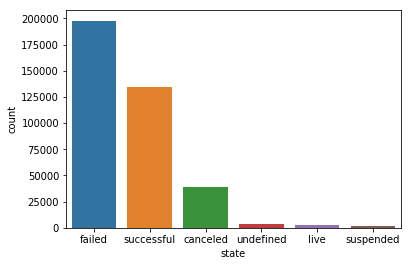

In [11]:
g = sns.countplot(df_kick['state'],
                 order = df_kick['state'].value_counts().index)

### Histogram - backers

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


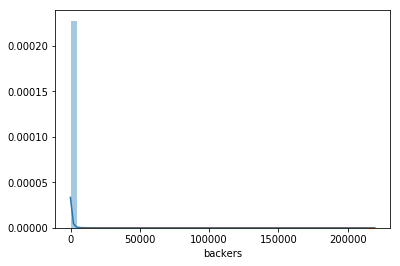

In [12]:
g = sns.distplot(df_kick['backers'])

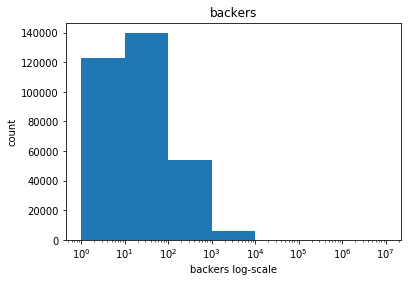

In [13]:
plt.hist(df_kick['backers'], bins=10**np.linspace(0, 7, 8)) 
plt.xscale('log') 
plt.xlabel('backers log-scale')
plt.ylabel('count')
plt.title('backers')
plt.show() 

In [14]:
display(df_kick[['backers']].sort_values(by='backers', ascending=False).head())

,backers
187652,219382
75900,154926
292244,105857
148585,91585
182657,87142


### Correlating backers and state
#### Observations.
- Majority of successful companies has more than 10 backers.
- On the contrary, other states (failed, canceled, live, suspended) have a tendency to have less than 10 backers.

#### Decisions.
- Consider backers for model training.

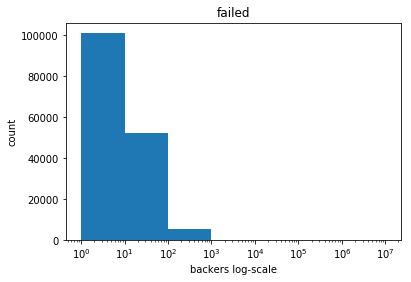

In [15]:
plt.hist(df_kick['backers'][df_kick['state']=='failed'], bins=10**np.linspace(0, 7, 8)) 
plt.xscale('log') 
plt.xlabel('backers log-scale')
plt.ylabel('count')
plt.title('failed')
plt.show() 

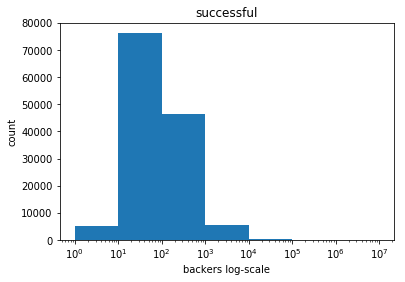

In [16]:
plt.hist(df_kick['backers'][df_kick['state']=='successful'], bins=10**np.linspace(0, 7, 8)) 
plt.xscale('log') 
plt.xlabel('backers log-scale')
plt.ylabel('count')
plt.title('successful')
plt.show() 

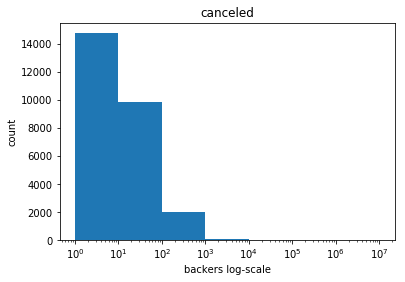

In [17]:
plt.hist(df_kick['backers'][df_kick['state']=='canceled'], bins=10**np.linspace(0, 7, 8)) 
plt.xscale('log') 
plt.xlabel('backers log-scale')
plt.ylabel('count')
plt.title('canceled')
plt.show() 

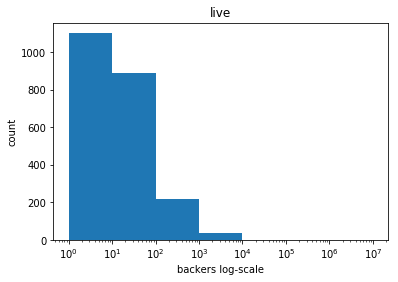

In [18]:
plt.hist(df_kick['backers'][df_kick['state']=='live'], bins=10**np.linspace(0, 7, 8)) 
plt.xscale('log') 
plt.xlabel('backers log-scale')
plt.ylabel('count')
plt.title('live')
plt.show() 

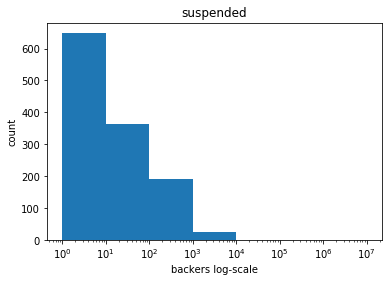

In [19]:
plt.hist(df_kick['backers'][df_kick['state']=='suspended'], bins=10**np.linspace(0, 7, 8)) 
plt.xscale('log') 
plt.xlabel('backers log-scale')
plt.ylabel('count')
plt.title('suspended')
plt.show() 

### Histogram - usd_goal_real

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


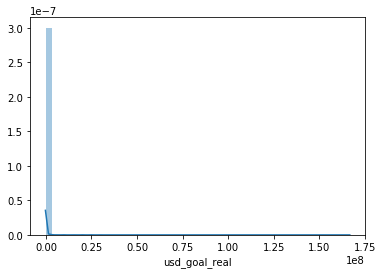

In [20]:
g = sns.distplot(df_kick['usd_goal_real'])

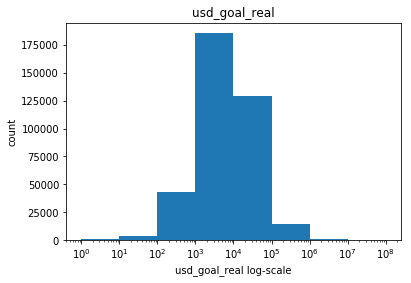

In [21]:
plt.hist(df_kick['usd_goal_real'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_goal_real log-scale')
plt.ylabel('count')
plt.title('usd_goal_real')
plt.show() 

In [22]:
display(df_kick[['usd_goal_real']].sort_values(by='usd_goal_real', ascending=False).head())

,usd_goal_real
47803,1.663614e+08
196531,1.513959e+08
367928,1.101698e+08
222208,1.073699e+08
226161,1.040572e+08


### Correlating usd_goal_real and state
#### Observations.
- Successful companies has a strong peak between 10^3 to 10^4 usd_goal_real.
- On the contrary, other states (failed, canceled, live, suspended) also have a peak but it is relatively weak.

#### Decisions.
- Consider usd_goal_real for model training.

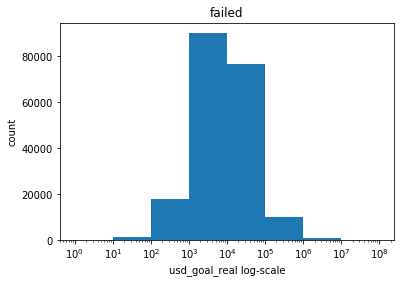

In [23]:
plt.hist(df_kick['usd_goal_real'][df_kick['state']=='failed'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_goal_real log-scale')
plt.ylabel('count')
plt.title('failed')
plt.show() 

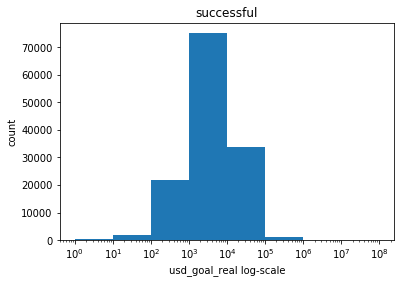

In [24]:
plt.hist(df_kick['usd_goal_real'][df_kick['state']=='successful'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_goal_real log-scale')
plt.ylabel('count')
plt.title('successful')
plt.show() 

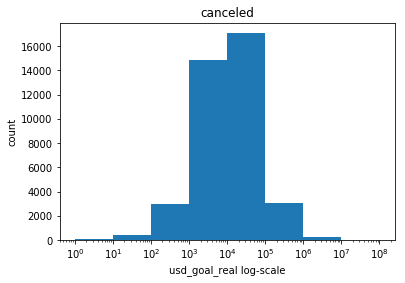

In [25]:
plt.hist(df_kick['usd_goal_real'][df_kick['state']=='canceled'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_goal_real log-scale')
plt.ylabel('count')
plt.title('canceled')
plt.show() 

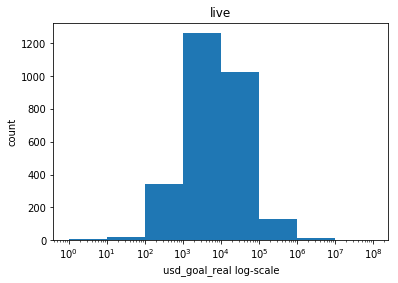

In [26]:
plt.hist(df_kick['usd_goal_real'][df_kick['state']=='live'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_goal_real log-scale')
plt.ylabel('count')
plt.title('live')
plt.show() 

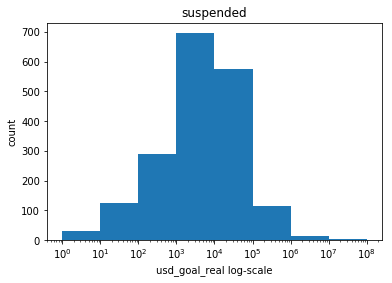

In [27]:
plt.hist(df_kick['usd_goal_real'][df_kick['state']=='suspended'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_goal_real log-scale')
plt.ylabel('count')
plt.title('suspended')
plt.show() 

### Histogram - usd_pledged_real

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


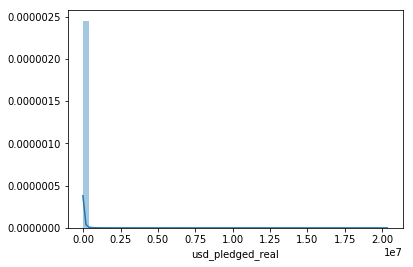

In [28]:
g = sns.distplot(df_kick['usd_pledged_real'])

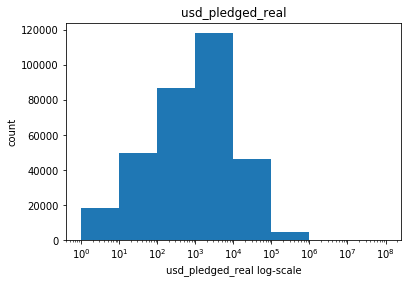

In [29]:
plt.hist(df_kick['usd_pledged_real'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_pledged_real log-scale')
plt.ylabel('count')
plt.title('usd_pledged_real')
plt.show() 

In [30]:
display(df_kick[['usd_pledged_real']].sort_values(by='usd_pledged_real', ascending=False).head())

,usd_pledged_real
157270,20338986.27
250254,13285226.36
216629,12779843.49
289915,12393139.69
282416,10266845.74


### Correlating usd_pledged_real and state
#### Observations.
- Successful companies has a strong peak between 10^3 to 10^4 usd_goal_real.
- On the contrary, other states (failed, canceled, live, suspended) have a peak at other bin.

#### Decisions.
- Consider usd_pledged_real for model training.

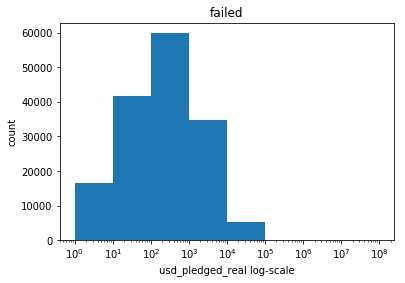

In [31]:
plt.hist(df_kick['usd_pledged_real'][df_kick['state']=='failed'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_pledged_real log-scale')
plt.ylabel('count')
plt.title('failed')
plt.show() 

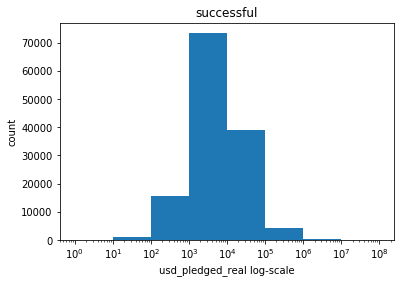

In [32]:
plt.hist(df_kick['usd_pledged_real'][df_kick['state']=='successful'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_pledged_real log-scale')
plt.ylabel('count')
plt.title('successful')
plt.show() 

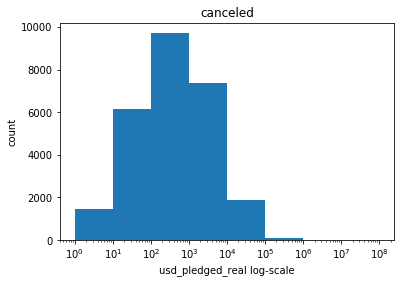

In [33]:
plt.hist(df_kick['usd_pledged_real'][df_kick['state']=='canceled'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_pledged_real log-scale')
plt.ylabel('count')
plt.title('canceled')
plt.show() 

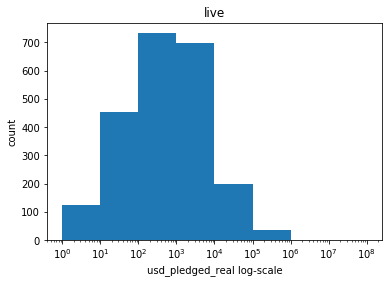

In [34]:
plt.hist(df_kick['usd_pledged_real'][df_kick['state']=='live'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_pledged_real log-scale')
plt.ylabel('count')
plt.title('live')
plt.show() 

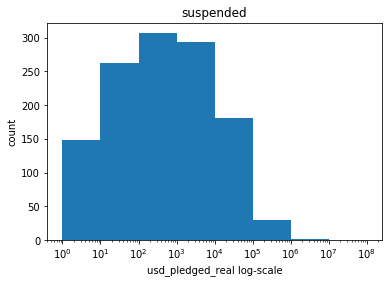

In [35]:
plt.hist(df_kick['usd_pledged_real'][df_kick['state']=='suspended'], bins=10**np.linspace(0, 8, 9)) 
plt.xscale('log') 
plt.xlabel('usd_pledged_real log-scale')
plt.ylabel('count')
plt.title('suspended')
plt.show() 

### Countplot - main_category

In [36]:
print(df_kick['main_category'].value_counts(dropna=False))

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


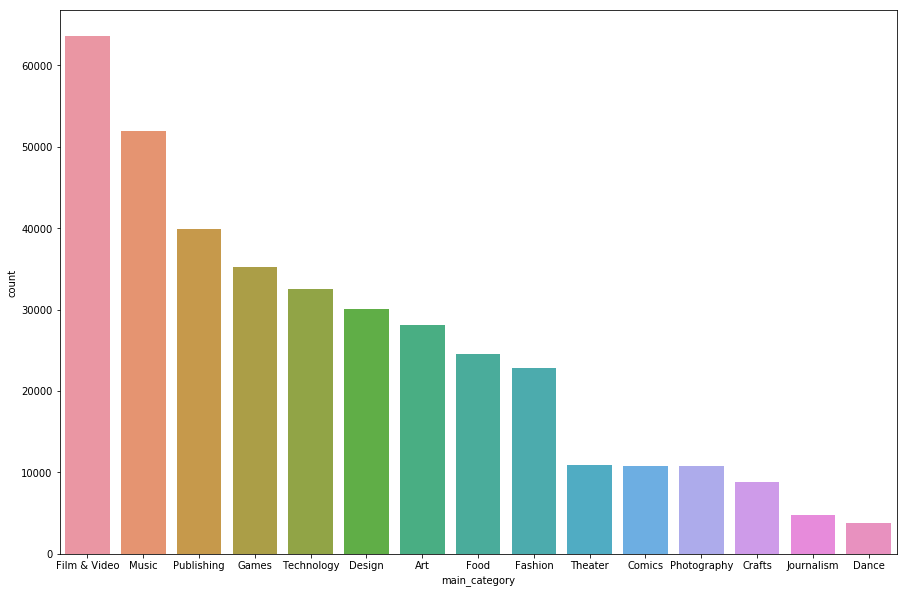

In [37]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['main_category'],
                 order = df_kick['main_category'].value_counts().index)

### Correlating main_category and state
#### Observations.
- Success rates are different between main_category.

#### Decisions.
- Consider main_category for model training.

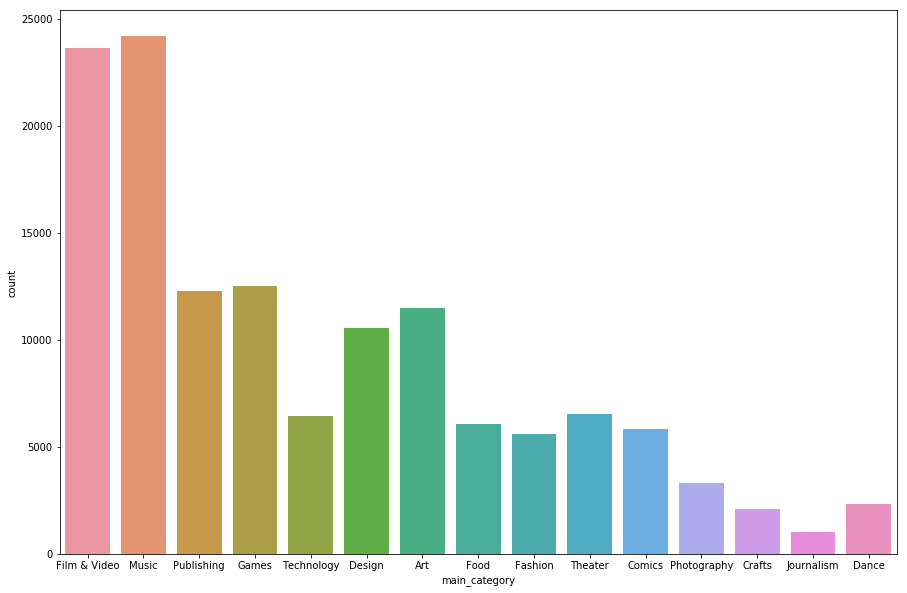

In [38]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['main_category'][df_kick['state'] == 'successful'],
                 order = df_kick['main_category'].value_counts().index)

In [39]:
df_main_category_successful_count = df_kick['main_category'][df_kick['state'] == 'successful'].value_counts()
# df_main_category_successful_count.to_dict()

In [40]:
df_main_category_all_count = df_kick['main_category'].value_counts()
# df_main_category_all_count.to_dict()

In [41]:
category_success_rate = {}

In [42]:
success_rate = {}
other_rate = {}

for main_category in df_main_category_all_count.keys():
    success_rate[main_category] = df_main_category_successful_count[main_category] / df_main_category_all_count[main_category]
    other_rate[main_category] = 1.0 - success_rate[main_category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

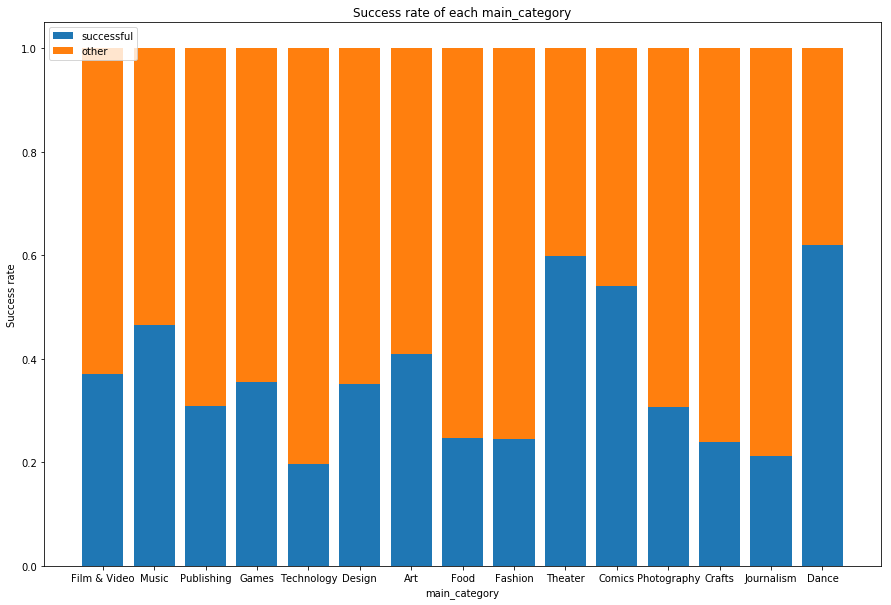

In [43]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('main_category')
plt.ylabel('Success rate')
plt.title('Success rate of each main_category')
plt.legend(loc='upper left')
plt.show()

### Countplot - category

In [44]:
print(df_kick['category'].value_counts(dropna=False).head(20))

Product Design      22314
Documentary         16139
Music               15727
Tabletop Games      14180
Shorts              12357
Video Games         11830
Food                11493
Film & Video        10108
Fiction              9169
Fashion              8554
Nonfiction           8318
Art                  8253
Apparel              7166
Theater              7057
Technology           6930
Rock                 6758
Children's Books     6756
Apps                 6345
Publishing           6018
Webseries            5762
Name: category, dtype: int64


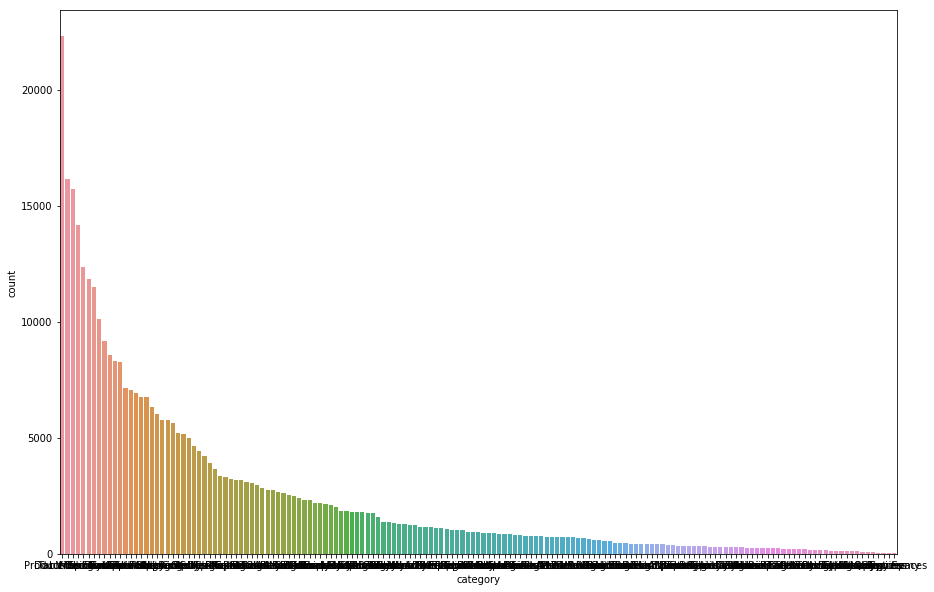

In [45]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'],
                 order = df_kick['category'].value_counts().index)

### Correlating category and state
#### Observations.
- Success rates are different between category.

#### Decisions.
- Consider category for model training.

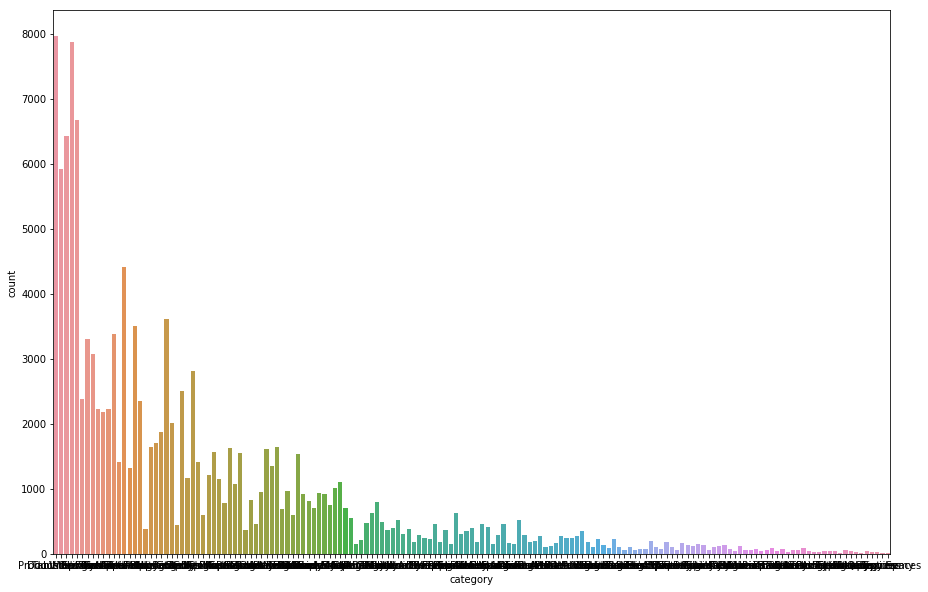

In [46]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['state'] == 'successful'],
                 order = df_kick['category'].value_counts().index)

In [47]:
df_category_successful_count = df_kick['category'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [48]:
df_category_all_count = df_kick['category'].value_counts()
# df_category_all_count.to_dict()

In [49]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

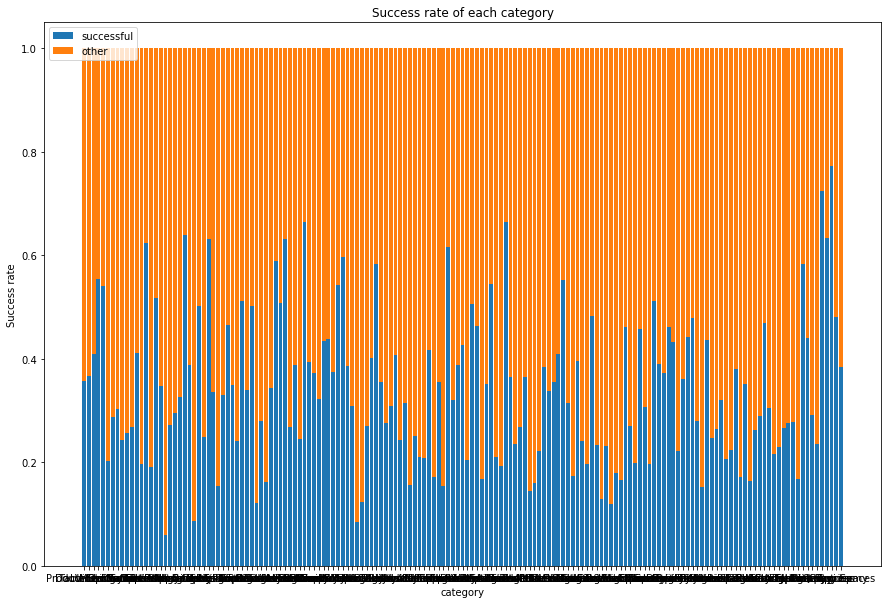

In [50]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Film & Video')

In [51]:
print(df_kick['category'][df_kick['main_category'] == 'Film & Video'].value_counts(dropna=False))

Documentary        16139
Shorts             12357
Film & Video       10108
Webseries           5762
Narrative Film      5188
Animation           2541
Drama               2179
Comedy              2125
Horror              1287
Television          1015
Thrillers            746
Science Fiction      744
Action               740
Music Videos         709
Experimental         551
Fantasy              345
Family               336
Festivals            291
Movie Theaters       232
Romance              190
Name: category, dtype: int64


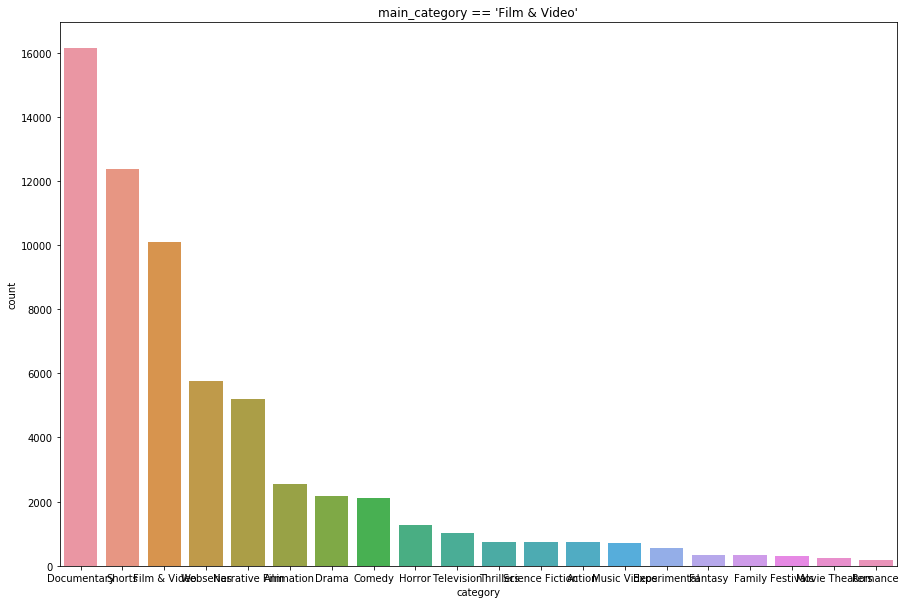

In [52]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Film & Video'],
                 order = df_kick['category'][df_kick['main_category'] == 'Film & Video'].value_counts().index) \
                    .set_title("main_category == 'Film & Video'")

### Correlating category (main_category == 'Film & Video') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

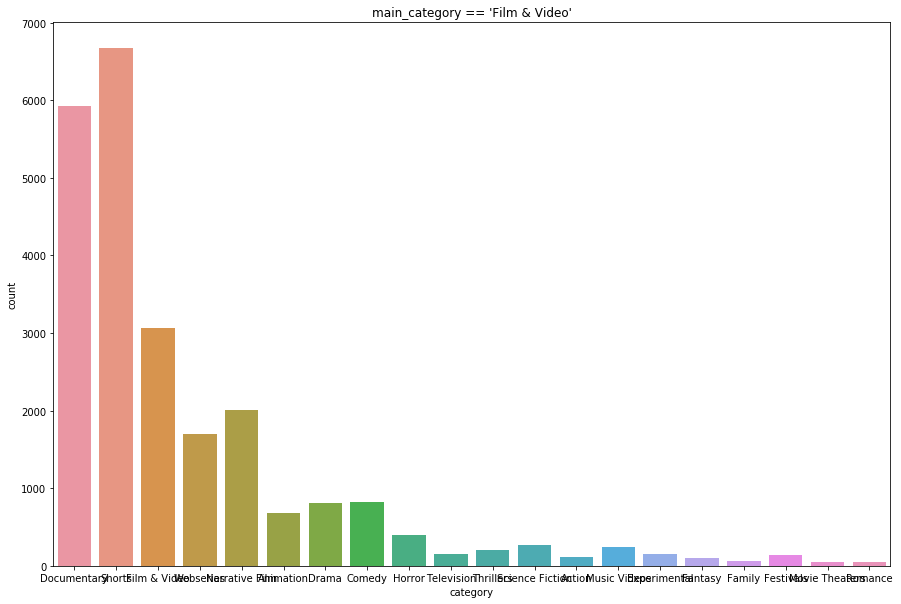

In [53]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Film & Video'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Film & Video'].value_counts().index) \
                    .set_title("main_category == 'Film & Video'")

In [54]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Film & Video'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [55]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Film & Video'].value_counts()
# df_category_all_count.to_dict()

In [56]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
category_success_rate

{'Film & Video': 0.3037198258804907,
 'Music': 0.466061866789938,
 'Publishing': 0.30847168581030243,
 'Games': 0.35531208310862594,
 'Technology': 0.19754981731093985,
 'Design': 0.35084802128367143,
 'Art': 0.408837424075587,
 'Food': 0.24733761482806277,
 'Fashion': 0.2451349929873773,
 'Theater': 0.5987354531292953,
 'Comics': 0.5399759682040854,
 'Photography': 0.3066147137953428,
 'Crafts': 0.24009535702122828,
 'Journalism': 0.2128286014721346,
 'Dance': 0.6204883227176221,
 'Documentary': 0.36706115620546503,
 'Shorts': 0.540017803674031,
 'Webseries': 0.2946893439777855,
 'Narrative Film': 0.3880107941403238,
 'Animation': 0.2683982683982684,
 'Drama': 0.3726480036714089,
 'Comedy': 0.38541176470588234,
 'Horror': 0.3084693084693085,
 'Television': 0.15369458128078817,
 'Thrillers': 0.2680965147453083,
 'Science Fiction': 0.3655913978494624,
 'Action': 0.1445945945945946,
 'Music Videos': 0.3385049365303244,
 'Experimental': 0.26678765880217786,
 'Fantasy': 0.3072463768115942,

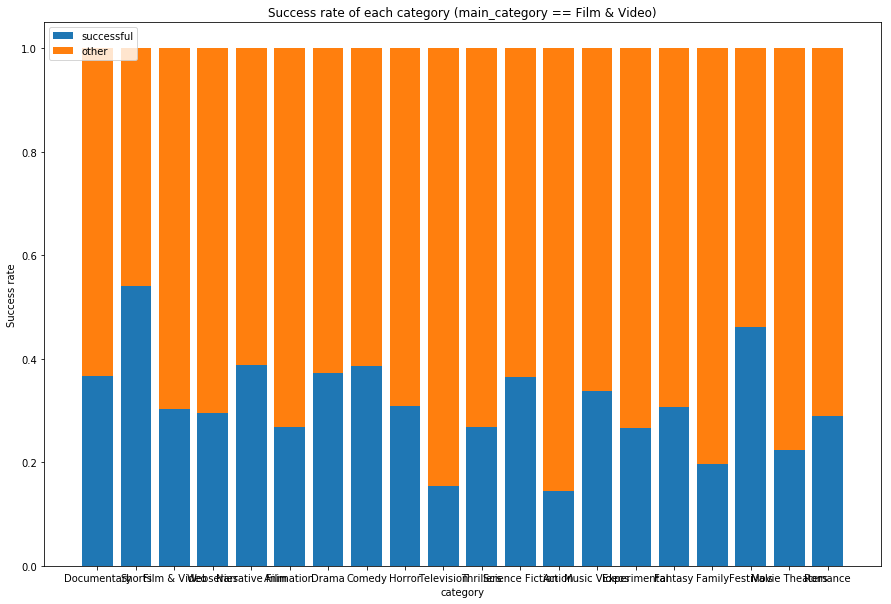

In [57]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Film & Video)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Music')

In [58]:
print(df_kick['category'][df_kick['main_category'] == 'Music'].value_counts(dropna=False))

Music               15727
Rock                 6758
Indie Rock           5657
Country & Folk       4451
Hip-Hop              3912
Pop                  3350
Classical Music      2613
Electronic Music     2170
World Music          2102
Jazz                 1850
Faith                1092
Metal                 717
R&B                   458
Punk                  317
Kids                  285
Blues                 268
Latin                 137
Chiptune               35
Comedy                 19
Name: category, dtype: int64


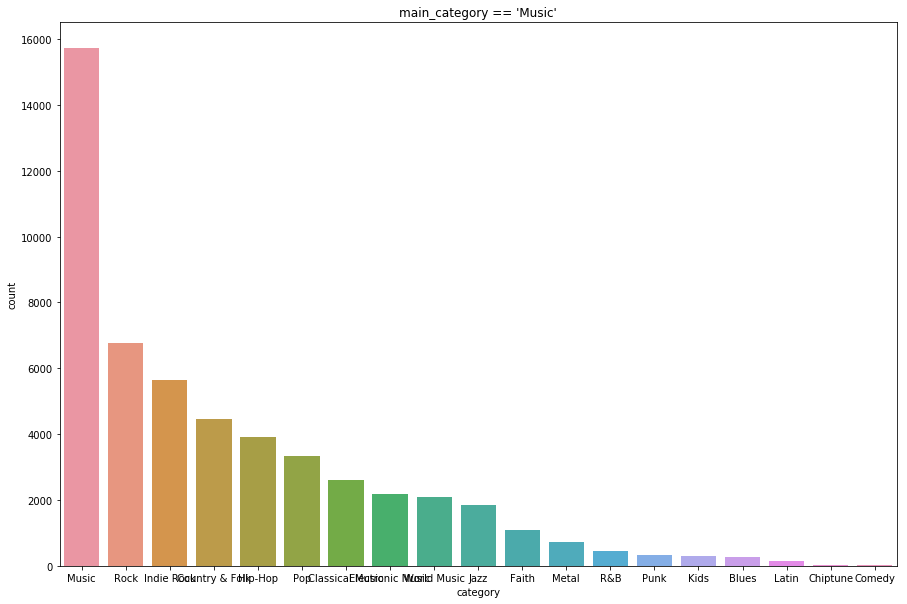

In [59]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Music'],
                 order = df_kick['category'][df_kick['main_category'] == 'Music'].value_counts().index) \
                    .set_title("main_category == 'Music'")

### Correlating category (main_category == 'Music') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

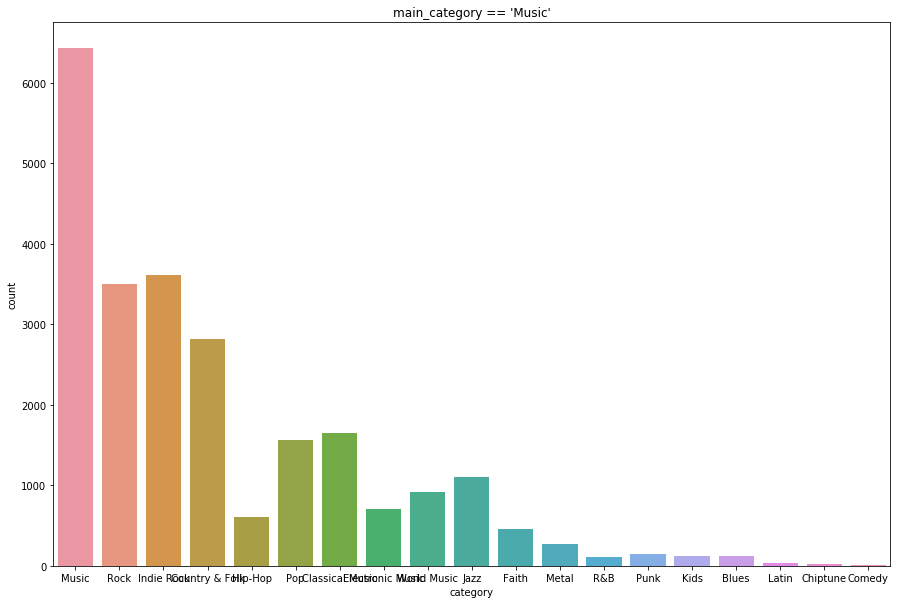

In [60]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Music'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Music'].value_counts().index) \
                    .set_title("main_category == 'Music'")

In [61]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Music'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [62]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Music'].value_counts()
# df_category_all_count.to_dict()

In [63]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

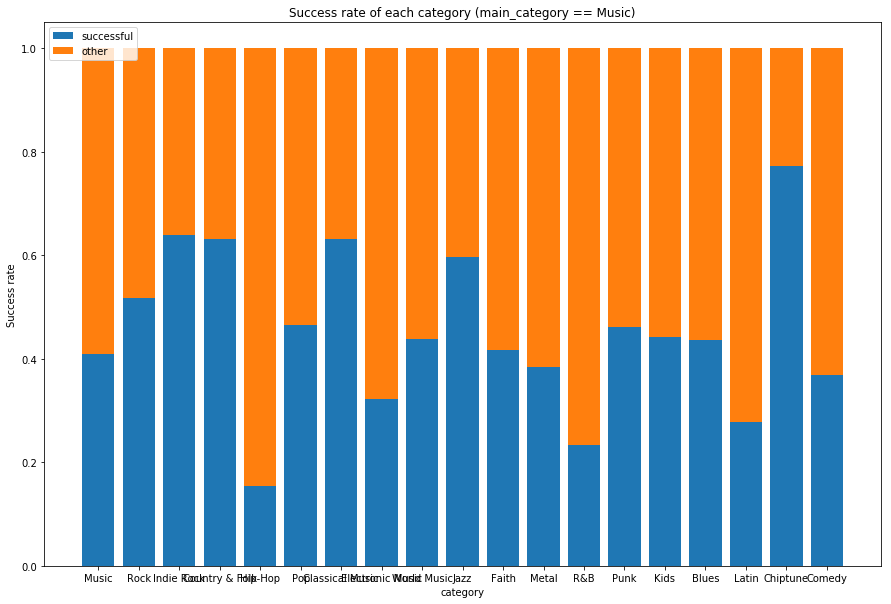

In [64]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Music)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Publishing')

In [65]:
print(df_kick['category'][df_kick['main_category'] == 'Publishing'].value_counts(dropna=False))

Fiction              9169
Nonfiction           8318
Children's Books     6756
Publishing           6018
Art Books            2676
Poetry               1369
Periodicals          1265
Radio & Podcasts      923
Academic              916
Young Adult           821
Zines                 391
Anthologies           379
Calendars             329
Literary Journals     278
Translations          153
Comedy                 75
Literary Spaces        27
Letterpress            11
Name: category, dtype: int64


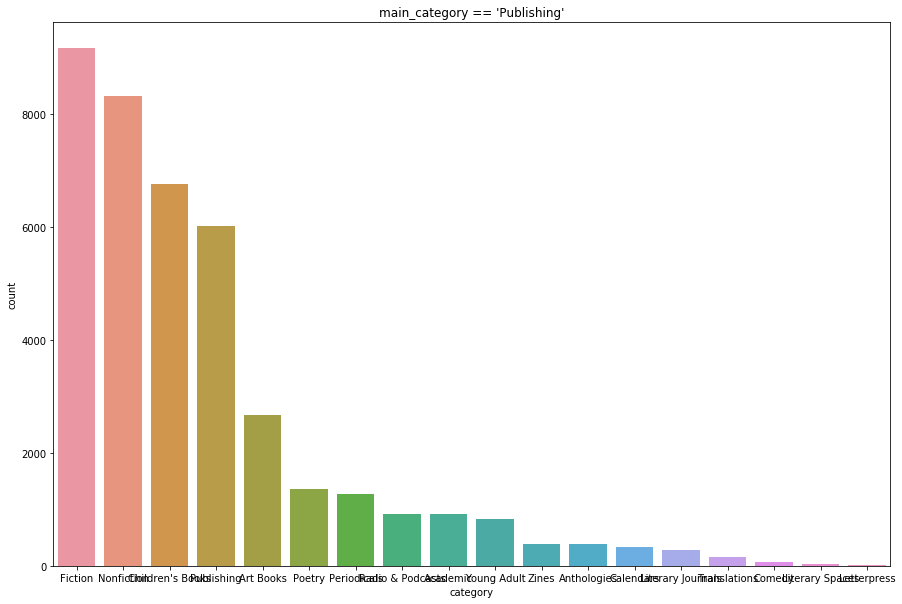

In [66]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Publishing'],
                 order = df_kick['category'][df_kick['main_category'] == 'Publishing'].value_counts().index) \
                    .set_title("main_category == 'Publishing'")

### Correlating category (main_category == 'Publishing') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

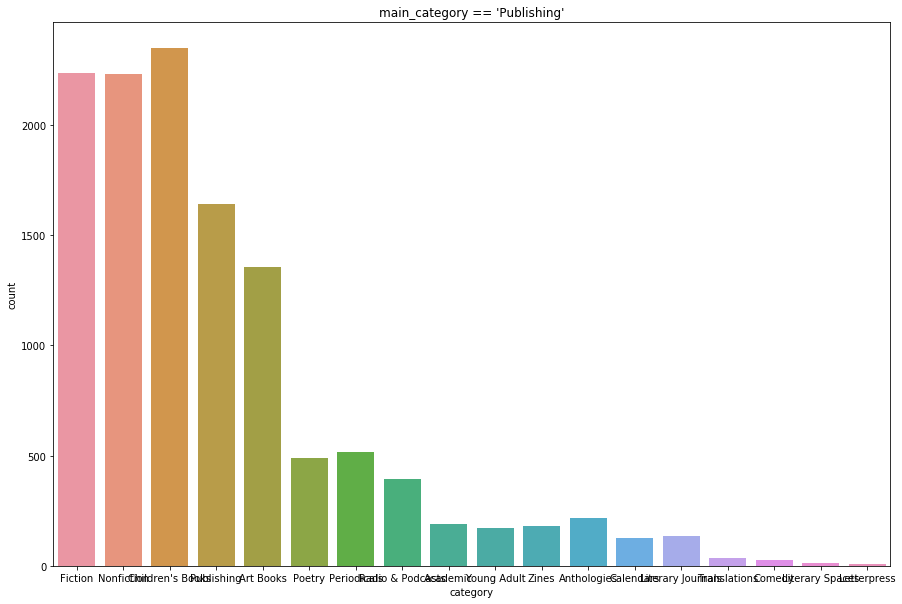

In [67]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Publishing'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Publishing'].value_counts().index) \
                    .set_title("main_category == 'Publishing'")

In [68]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Publishing'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [69]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Publishing'].value_counts()
# df_category_all_count.to_dict()

In [70]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

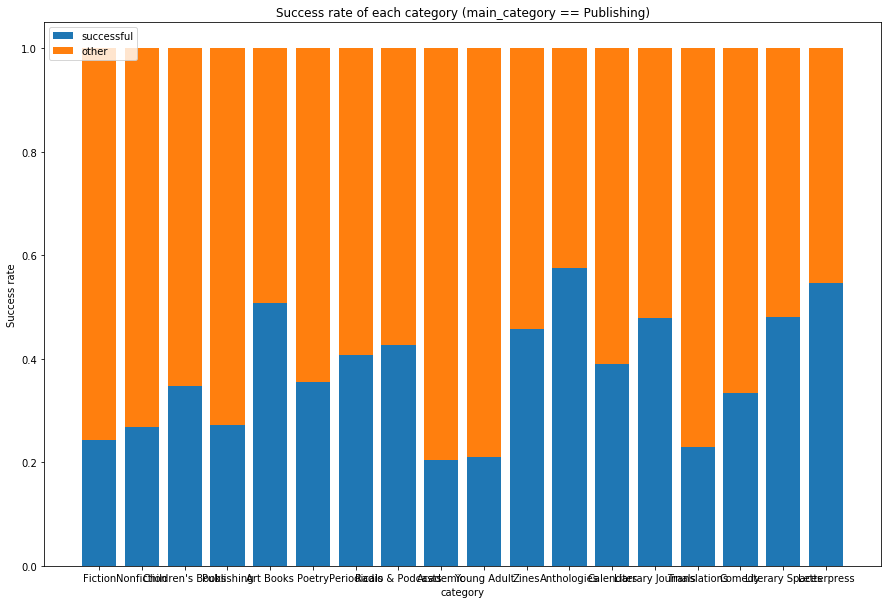

In [71]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Publishing)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Games')

In [72]:
print(df_kick['category'][df_kick['main_category'] == 'Games'].value_counts(dropna=False))

Tabletop Games     14180
Video Games        11830
Games               3226
Playing Cards       2497
Mobile Games        1789
Live Games          1050
Gaming Hardware      428
Puzzles              231
Name: category, dtype: int64


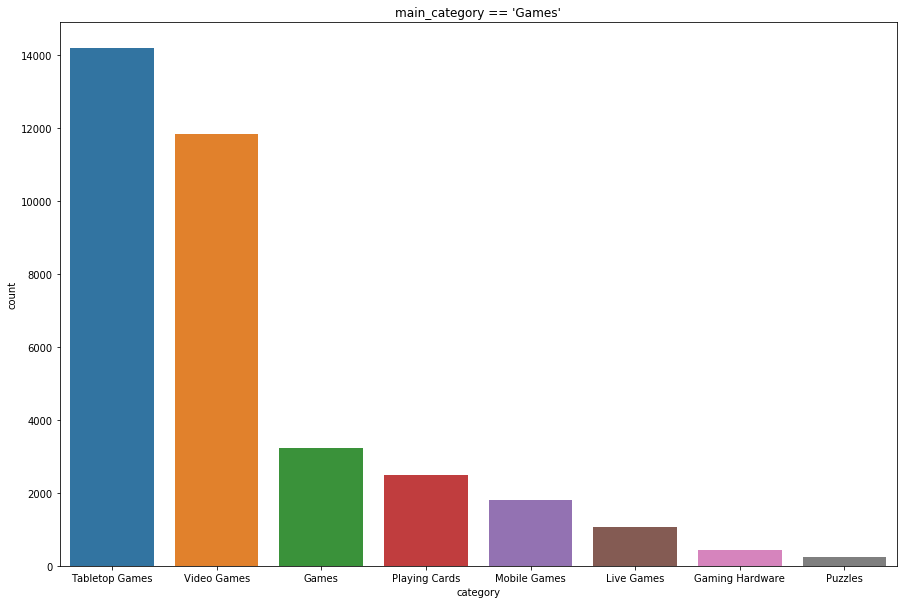

In [73]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Games'],
                 order = df_kick['category'][df_kick['main_category'] == 'Games'].value_counts().index) \
                    .set_title("main_category == 'Games'")

### Correlating category (main_category == 'Games') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

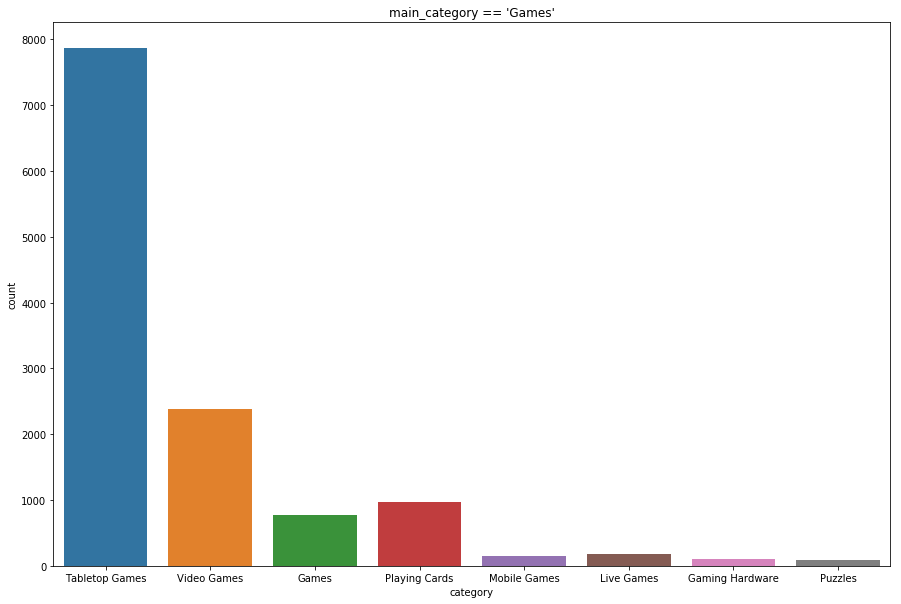

In [74]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Games'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Games'].value_counts().index) \
                    .set_title("main_category == 'Games'")

In [75]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Games'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [76]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Games'].value_counts()
# df_category_all_count.to_dict()

In [77]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

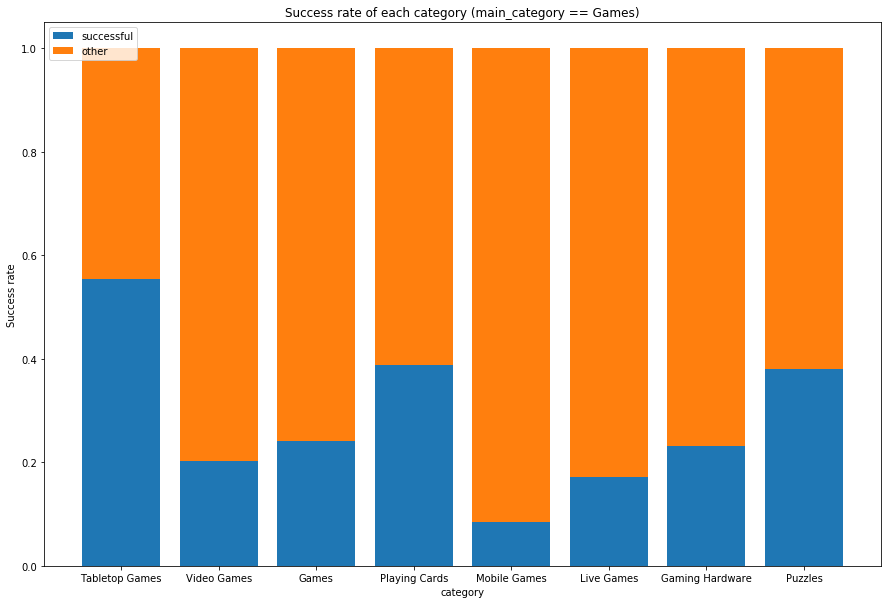

In [78]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Games)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Technology')

In [79]:
print(df_kick['category'][df_kick['main_category'] == 'Technology'].value_counts(dropna=False))

Technology           6930
Apps                 6345
Web                  3906
Hardware             3663
Software             3048
Gadgets              2965
Wearables            1233
DIY Electronics       902
3D Printing           683
Sound                 669
Robots                572
Flight                426
Camera Equipment      416
Space Exploration     323
Fabrication Tools     250
Makerspaces           238
Name: category, dtype: int64


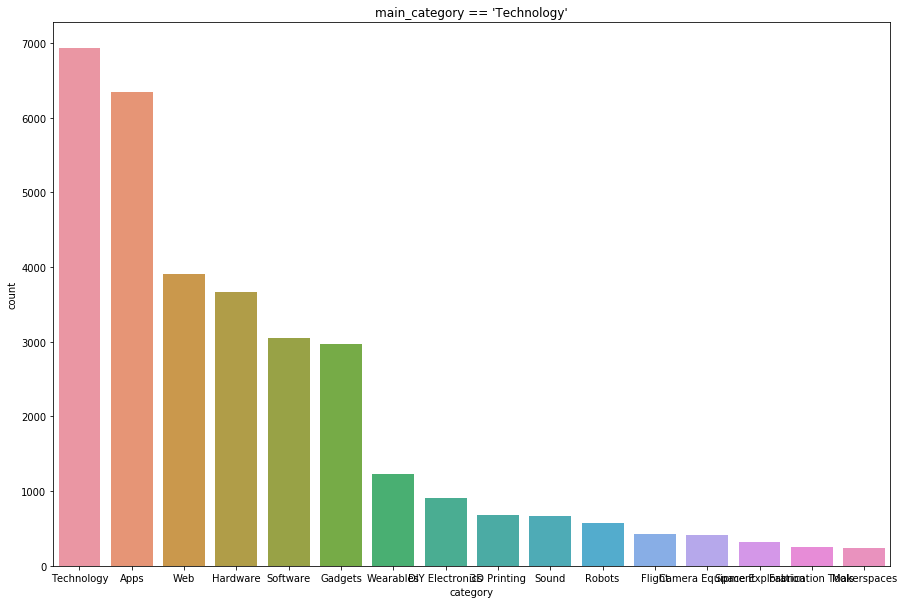

In [80]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Technology'],
                 order = df_kick['category'][df_kick['main_category'] == 'Technology'].value_counts().index) \
                    .set_title("main_category == 'Technology'")

### Correlating category (main_category == 'Technology') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

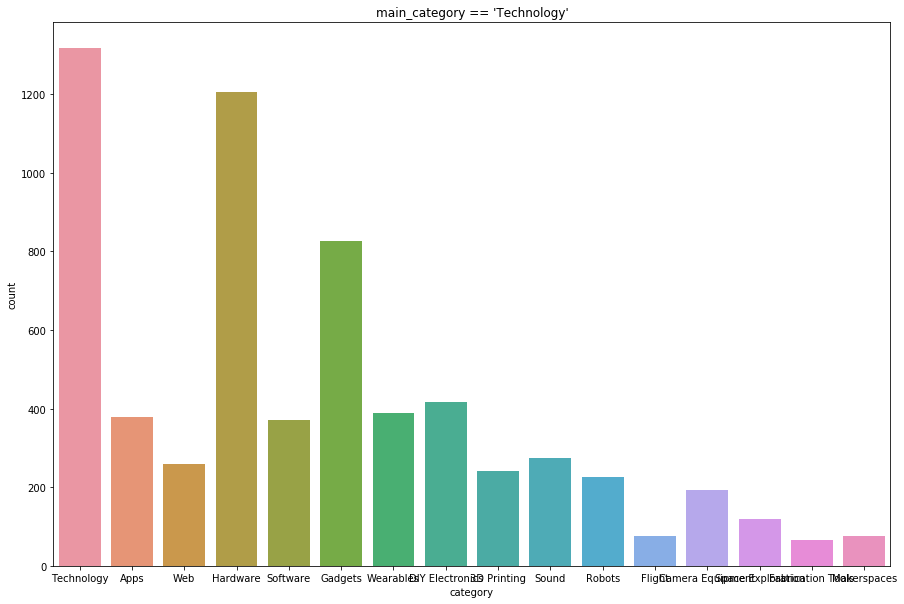

In [81]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Technology'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Technology'].value_counts().index) \
                    .set_title("main_category == 'Technology'")

In [82]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Technology'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [83]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Technology'].value_counts()
# df_category_all_count.to_dict()

In [84]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

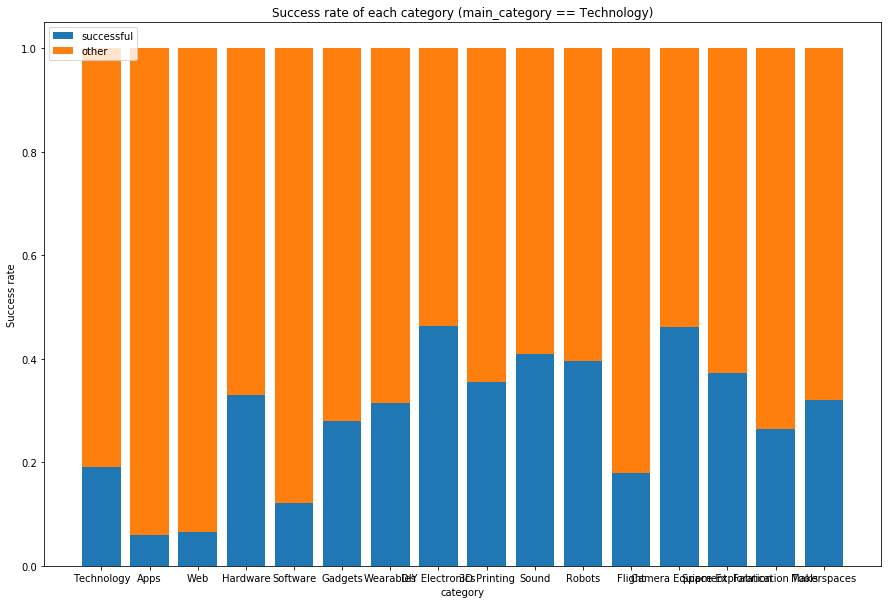

In [85]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Technology)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Design')

In [86]:
print(df_kick['category'][df_kick['main_category'] == 'Design'].value_counts(dropna=False))

Product Design        22314
Design                 4199
Graphic Design         2002
Architecture            760
Interactive Design      398
Civic Design            289
Typography              108
Name: category, dtype: int64


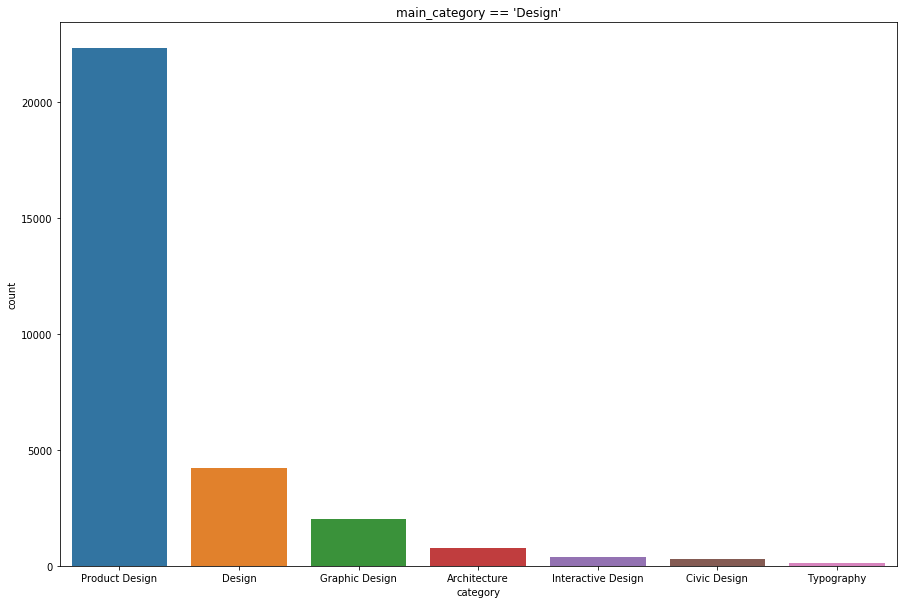

In [87]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Design'],
                 order = df_kick['category'][df_kick['main_category'] == 'Design'].value_counts().index) \
                    .set_title("main_category == 'Design'")

### Correlating category (main_category == 'Design') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

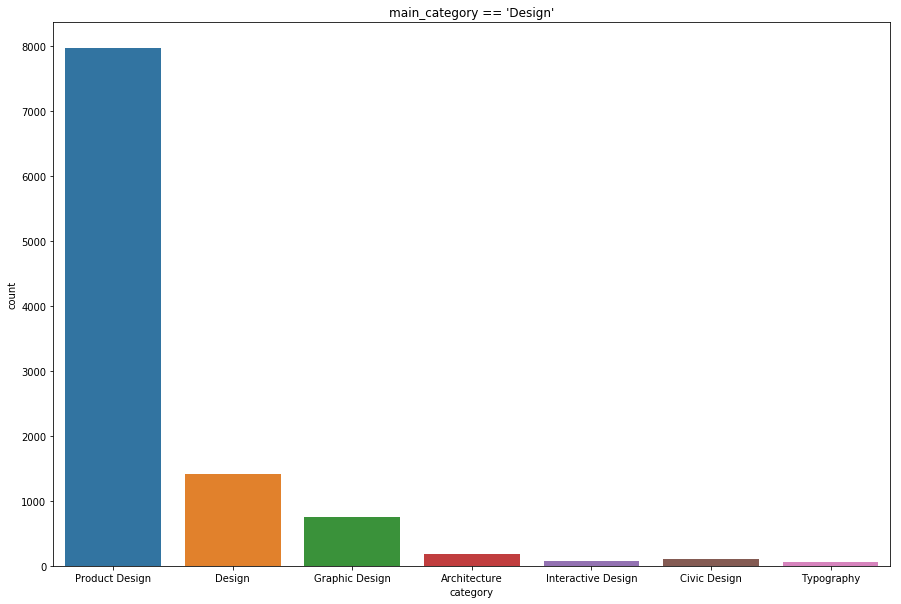

In [88]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Design'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Design'].value_counts().index) \
                    .set_title("main_category == 'Design'")

In [89]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Design'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [90]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Design'].value_counts()
# df_category_all_count.to_dict()

In [91]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

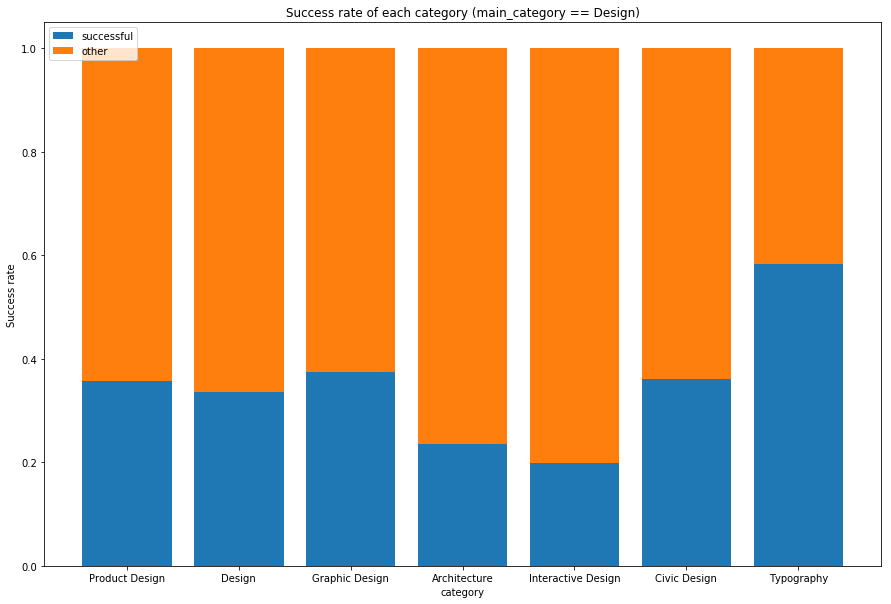

In [92]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Design)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Art')

In [93]:
print(df_kick['category'][df_kick['main_category'] == 'Art'].value_counts(dropna=False))

Art                8253
Painting           3294
Illustration       3175
Public Art         3077
Mixed Media        2757
Performance Art    2154
Sculpture          1810
Digital Art        1346
Conceptual Art     1030
Installations       482
Ceramics            305
Textiles            276
Video Art           194
Name: category, dtype: int64


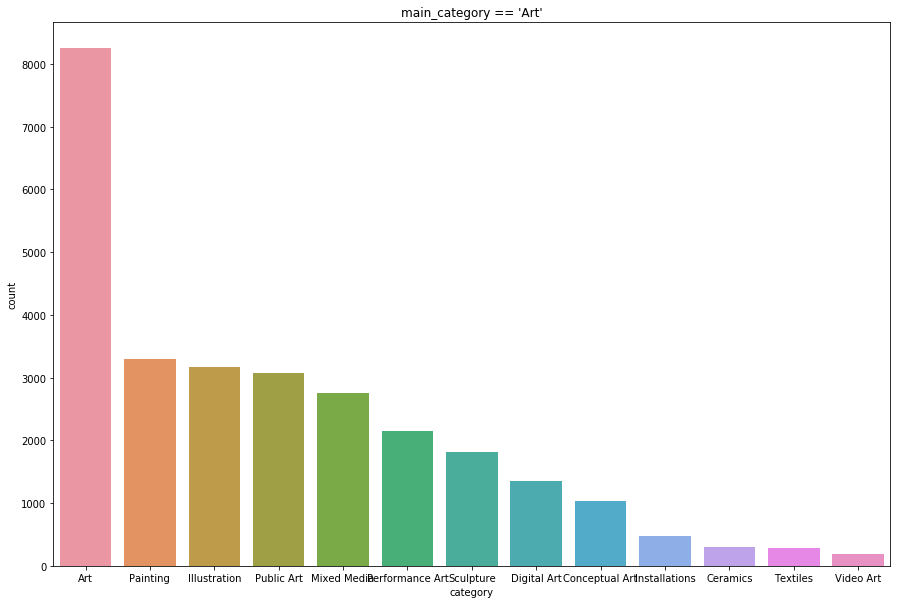

In [94]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Art'],
                 order = df_kick['category'][df_kick['main_category'] == 'Art'].value_counts().index) \
                    .set_title("main_category == 'Art'")

### Correlating category (main_category == 'Art') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

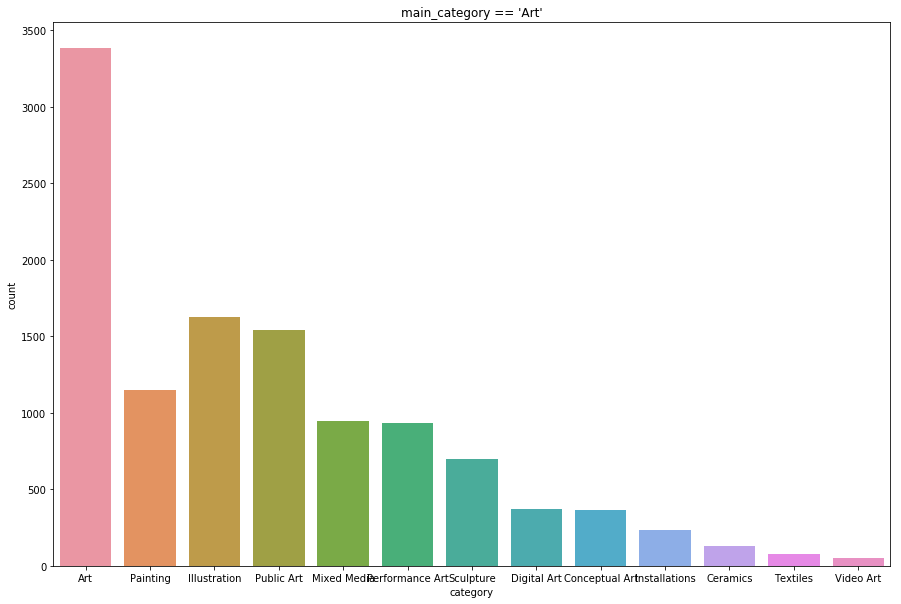

In [95]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Art'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Art'].value_counts().index) \
                    .set_title("main_category == 'Art'")

In [96]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Art'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [97]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Art'].value_counts()
# df_category_all_count.to_dict()

In [98]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

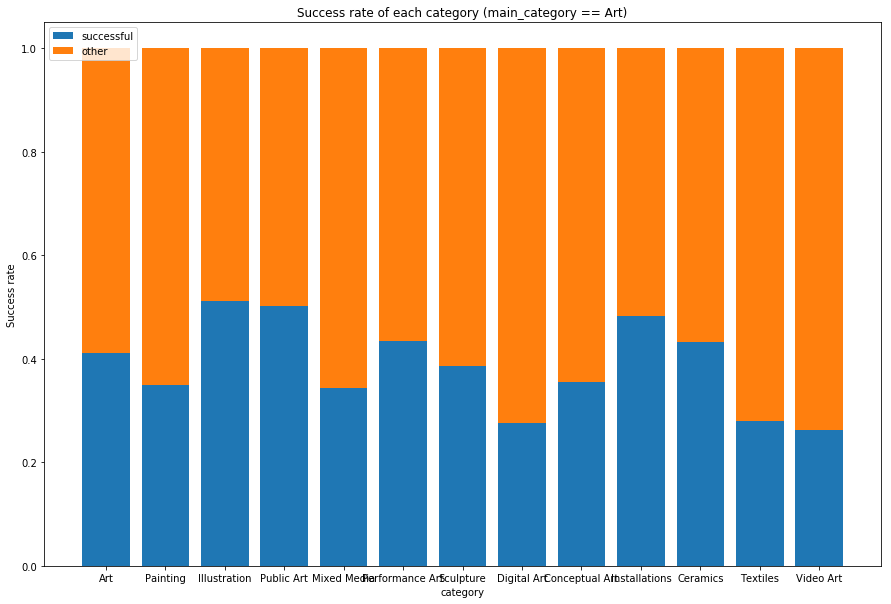

In [99]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Art)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Food')

In [100]:
print(df_kick['category'][df_kick['main_category'] == 'Food'].value_counts(dropna=False))

Food                 11493
Restaurants           2819
Drinks                2422
Small Batch           1808
Food Trucks           1752
Farms                 1154
Events                 655
Vegan                  588
Cookbooks              540
Spaces                 428
Farmer's Markets       424
Community Gardens      298
Bacon                  221
Name: category, dtype: int64


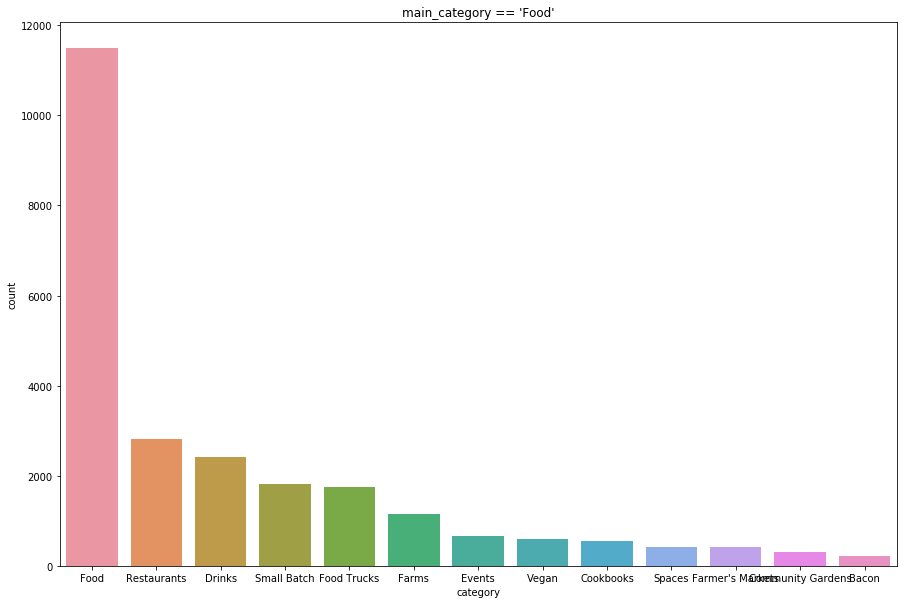

In [101]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Food'],
                 order = df_kick['category'][df_kick['main_category'] == 'Food'].value_counts().index) \
                    .set_title("main_category == 'Food'")

### Correlating category (main_category == 'Food') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

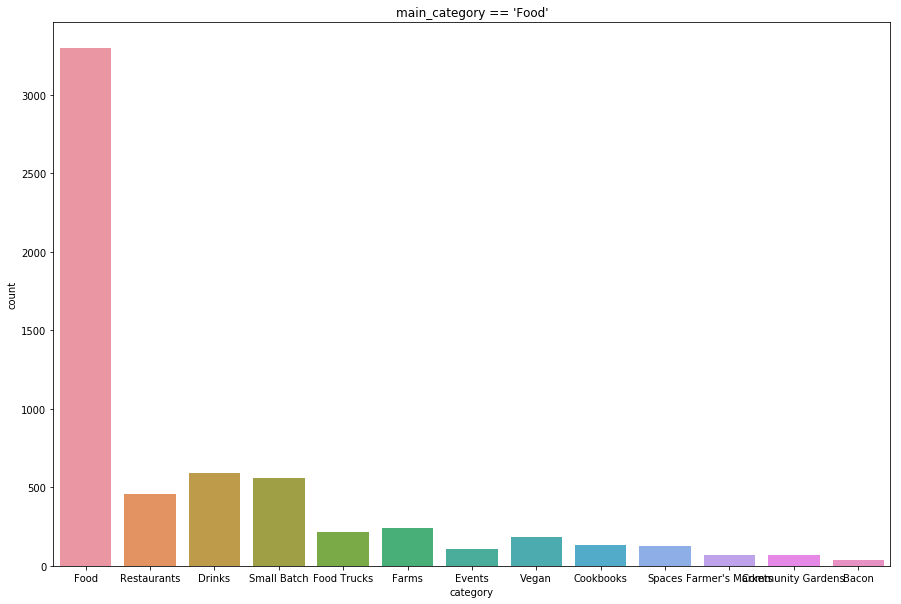

In [102]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Food'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Food'].value_counts().index) \
                    .set_title("main_category == 'Food'")

In [103]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Food'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [104]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Food'].value_counts()
# df_category_all_count.to_dict()

In [105]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

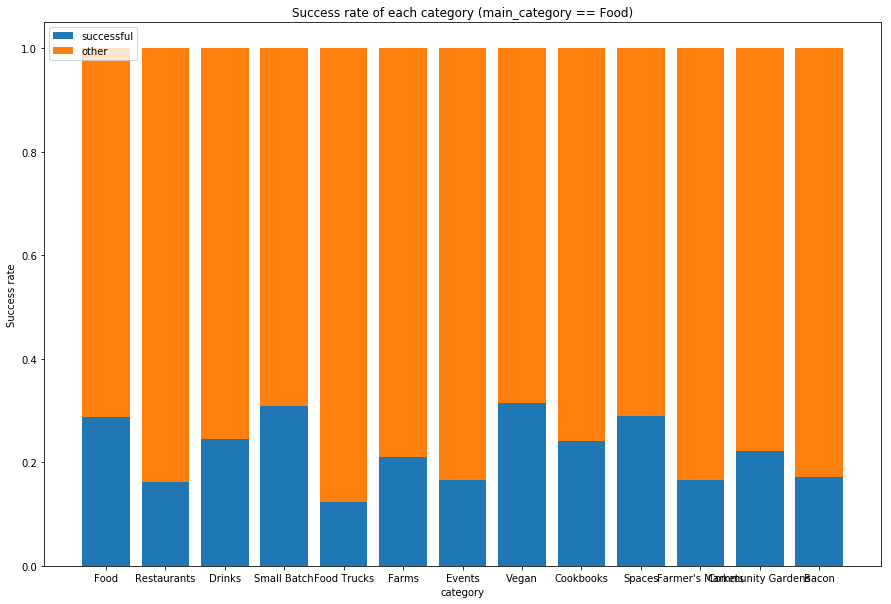

In [106]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Food)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Fashion')

In [107]:
print(df_kick['category'][df_kick['main_category'] == 'Fashion'].value_counts(dropna=False))

Fashion          8554
Apparel          7166
Accessories      3165
Jewelry          1239
Footwear          931
Ready-to-wear     864
Childrenswear     483
Couture           275
Pet Fashion       139
Name: category, dtype: int64


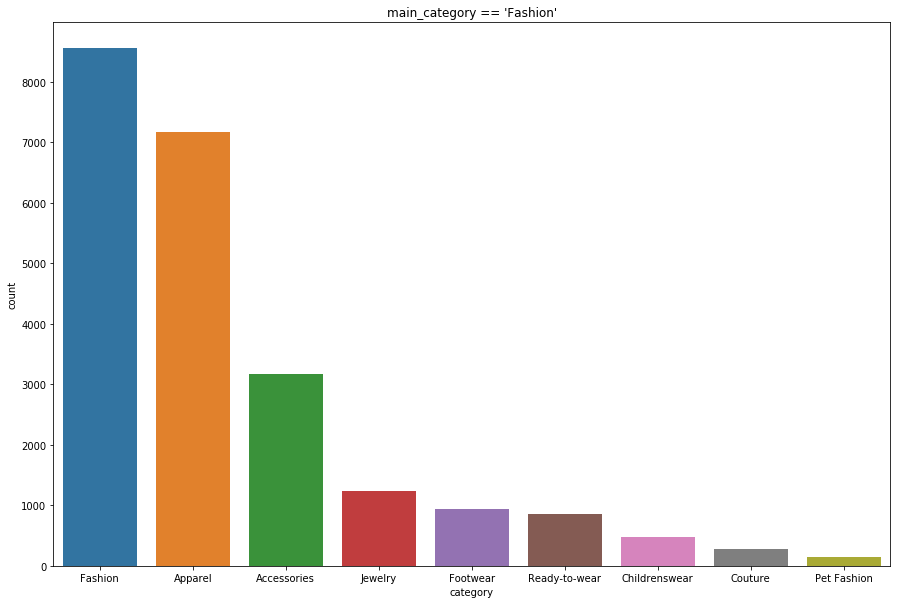

In [108]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Fashion'],
                 order = df_kick['category'][df_kick['main_category'] == 'Fashion'].value_counts().index) \
                    .set_title("main_category == 'Fashion'")

### Correlating category (main_category == 'Fashion') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

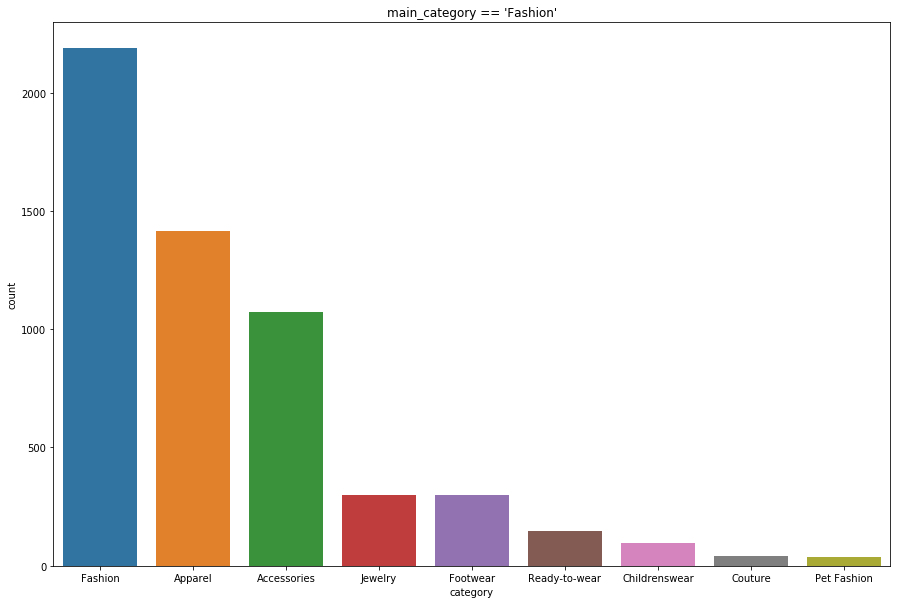

In [109]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Fashion'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Fashion'].value_counts().index) \
                    .set_title("main_category == 'Fashion'")

In [110]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Fashion'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [111]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Fashion'].value_counts()
# df_category_all_count.to_dict()

In [112]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

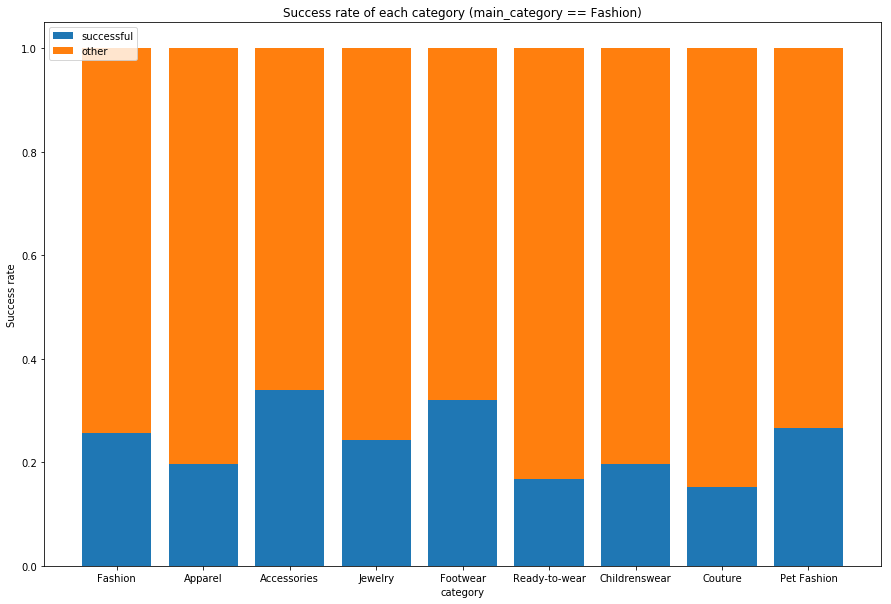

In [113]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Fashion)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Theater')

In [114]:
print(df_kick['category'][df_kick['main_category'] == 'Theater'].value_counts(dropna=False))

Theater         7057
Plays           1378
Musical          913
Festivals        548
Experimental     373
Immersive        330
Spaces           213
Comedy           101
Name: category, dtype: int64


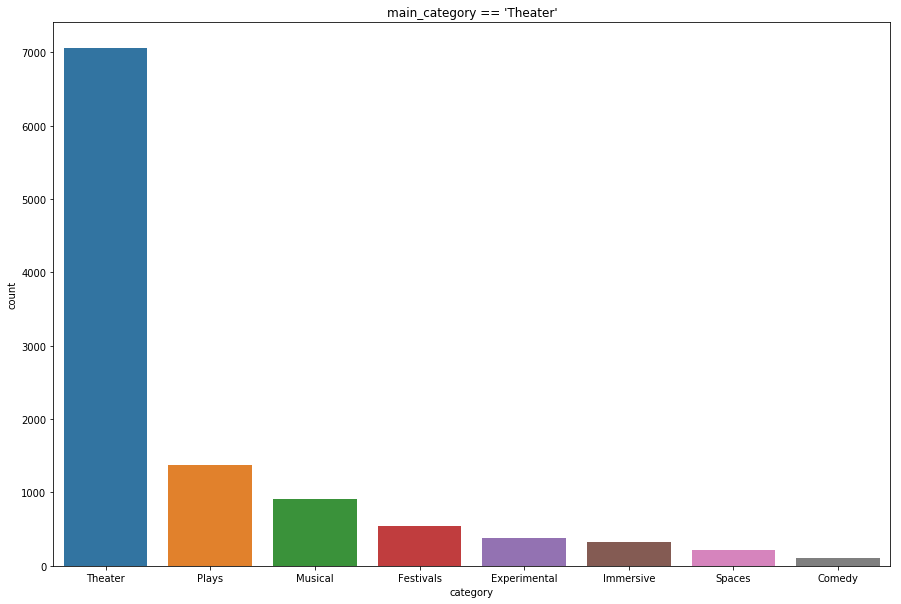

In [115]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Theater'],
                 order = df_kick['category'][df_kick['main_category'] == 'Theater'].value_counts().index) \
                    .set_title("main_category == 'Theater'")

### Correlating category (main_category == 'Theater') and state
#### Observations.
- Success rates are different between category in the main_category.
- However, the ratio of the difference is smaller than other main_category.

#### Decisions.
- Consider category in the main_category for model training, anyway.

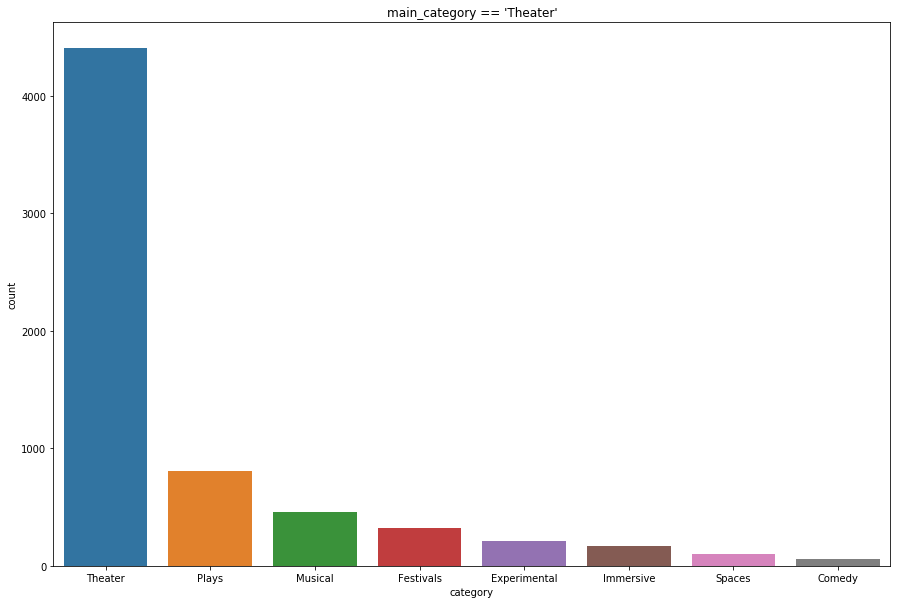

In [116]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Theater'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Theater'].value_counts().index) \
                    .set_title("main_category == 'Theater'")

In [117]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Theater'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [118]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Theater'].value_counts()
# df_category_all_count.to_dict()

In [119]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

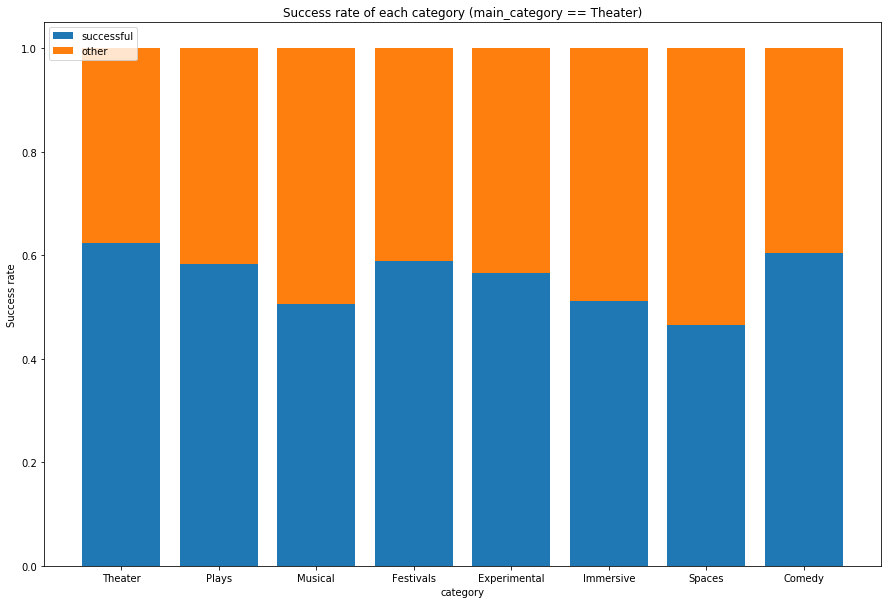

In [120]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Theater)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Comics')

In [121]:
print(df_kick['category'][df_kick['main_category'] == 'Comics'].value_counts(dropna=False))

Comics            4996
Comic Books       2743
Graphic Novels    1864
Webcomics          648
Anthologies        405
Events             163
Name: category, dtype: int64


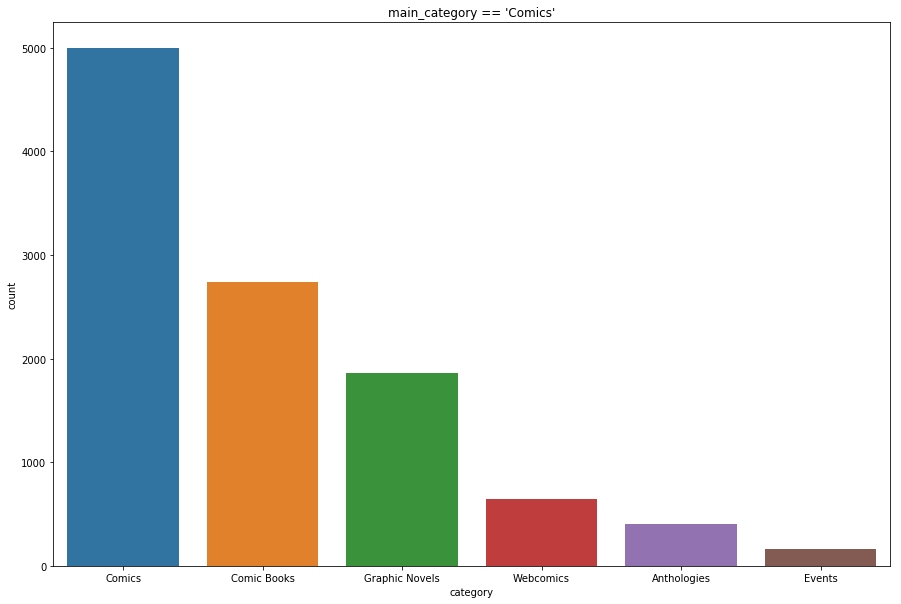

In [122]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Comics'],
                 order = df_kick['category'][df_kick['main_category'] == 'Comics'].value_counts().index) \
                    .set_title("main_category == 'Comics'")

### Correlating category (main_category == 'Comics') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

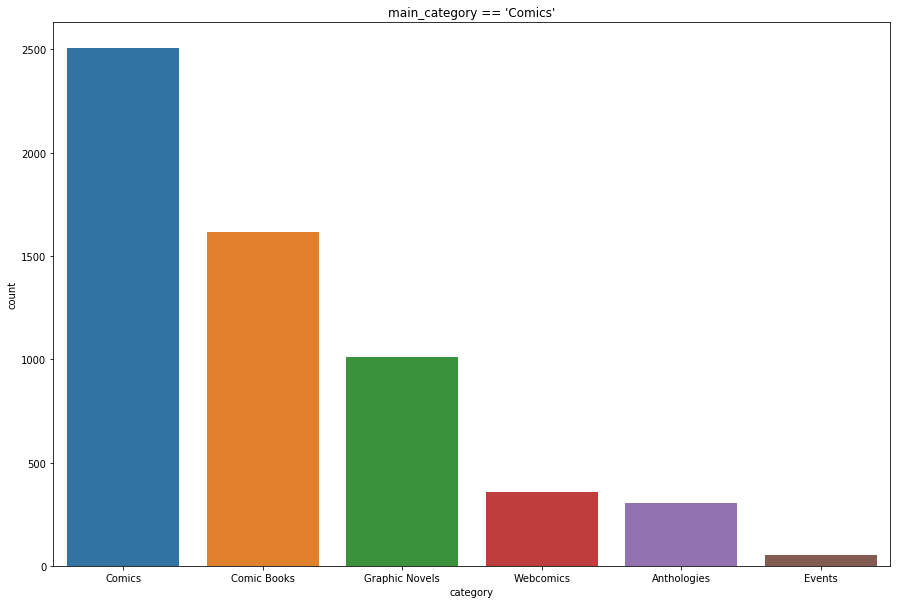

In [123]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Comics'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Comics'].value_counts().index) \
                    .set_title("main_category == 'Comics'")

In [124]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Comics'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [125]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Comics'].value_counts()
# df_category_all_count.to_dict()

In [126]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

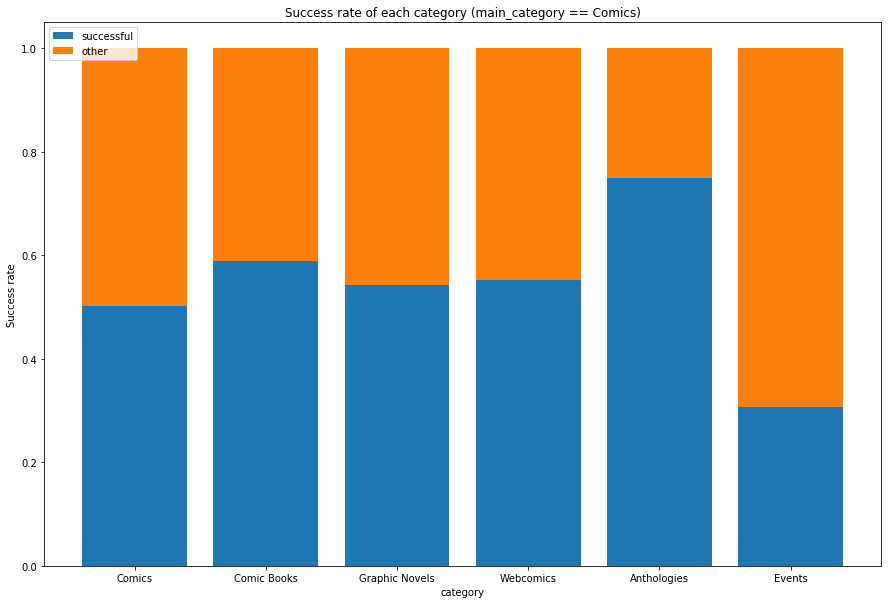

In [127]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Comics)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Photography')

In [128]:
print(df_kick['category'][df_kick['main_category'] == 'Photography'].value_counts(dropna=False))

Photography    5752
Photobooks     1580
People         1103
Fine Art        776
Places          739
Nature          574
Animals         255
Name: category, dtype: int64


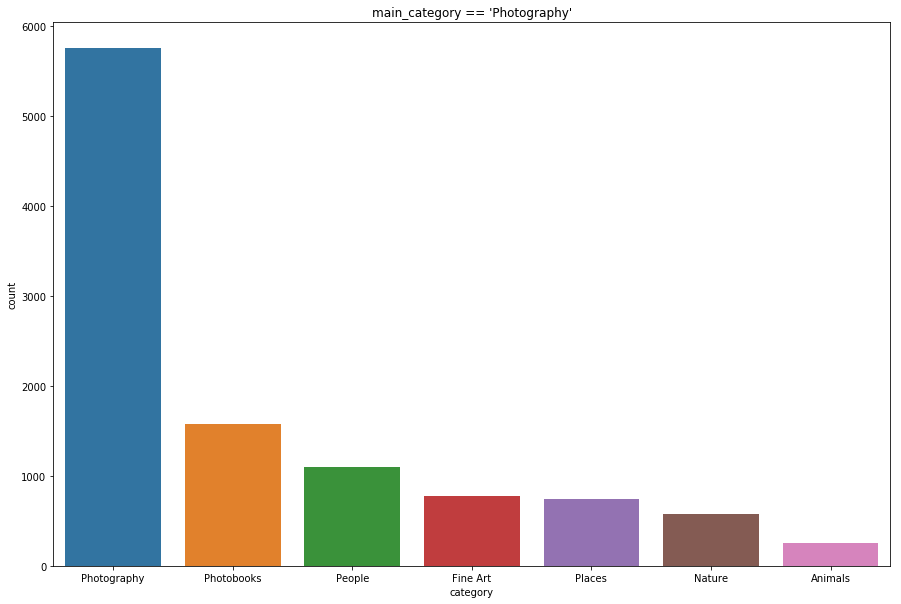

In [129]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Photography'],
                 order = df_kick['category'][df_kick['main_category'] == 'Photography'].value_counts().index) \
                    .set_title("main_category == 'Photography'")

### Correlating category (main_category == 'Photography') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

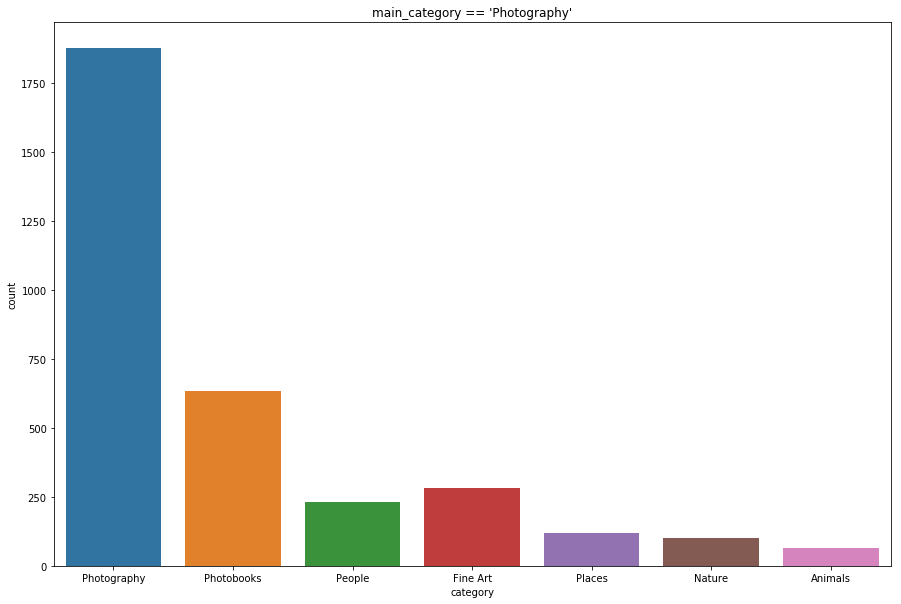

In [130]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Photography'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Photography'].value_counts().index) \
                    .set_title("main_category == 'Photography'")

In [131]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Photography'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [132]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Photography'].value_counts()
# df_category_all_count.to_dict()

In [133]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

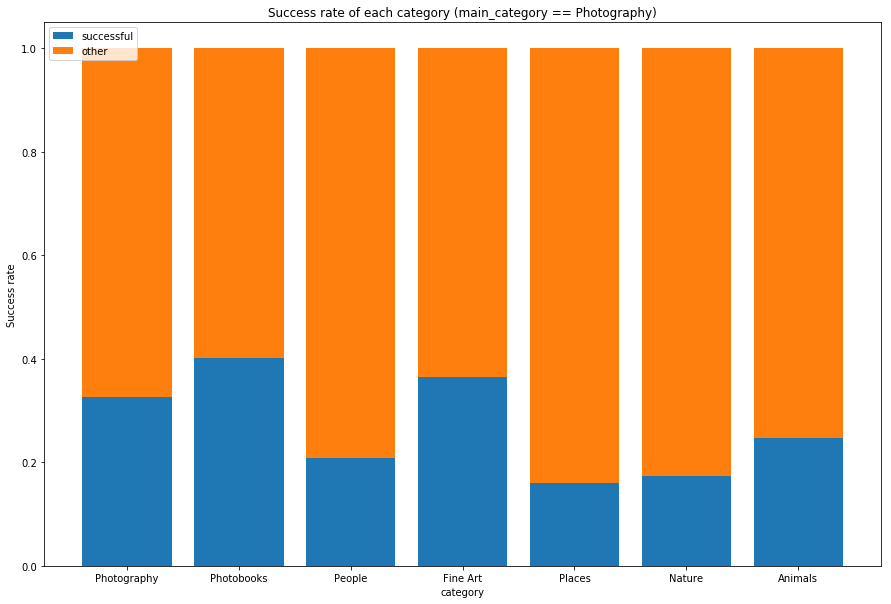

In [134]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Photography)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Crafts')

In [135]:
print(df_kick['category'][df_kick['main_category'] == 'Crafts'].value_counts(dropna=False))

Crafts         4664
DIY            1173
Woodworking    1167
Candles         429
Printing        238
Stationery      219
Knitting        181
Crochet         162
Glass           138
Embroidery      113
Pottery         100
Weaving          93
Quilts           81
Letterpress      38
Taxidermy        13
Name: category, dtype: int64


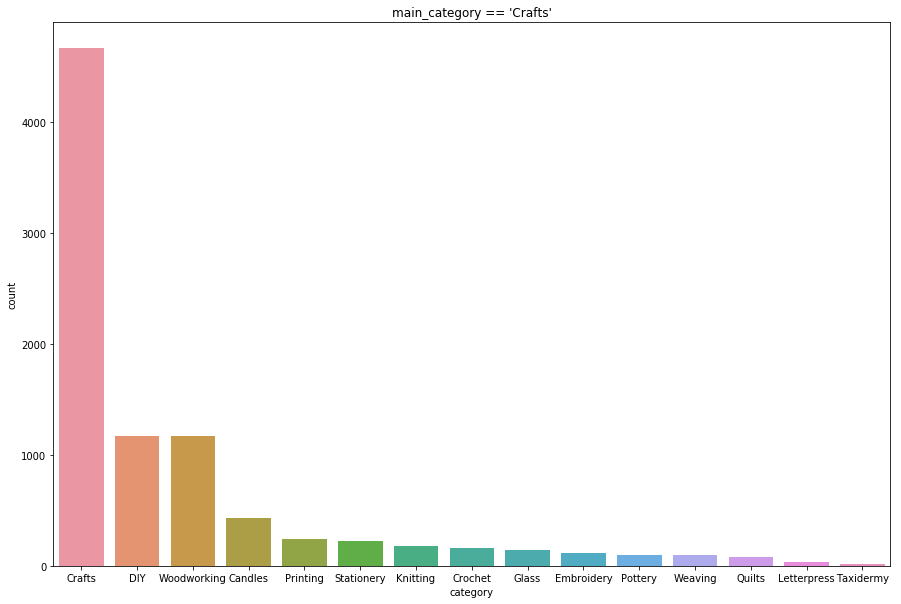

In [136]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Crafts'],
                 order = df_kick['category'][df_kick['main_category'] == 'Crafts'].value_counts().index) \
                    .set_title("main_category == 'Crafts'")

### Correlating category (main_category == 'Crafts') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

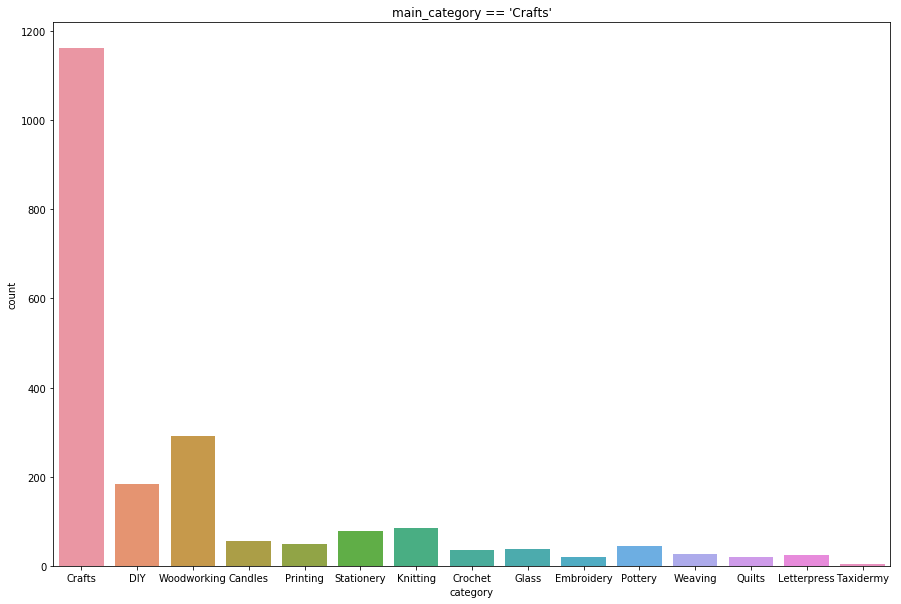

In [137]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Crafts'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Crafts'].value_counts().index) \
                    .set_title("main_category == 'Crafts'")

In [138]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Crafts'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [139]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Crafts'].value_counts()
# df_category_all_count.to_dict()

In [140]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

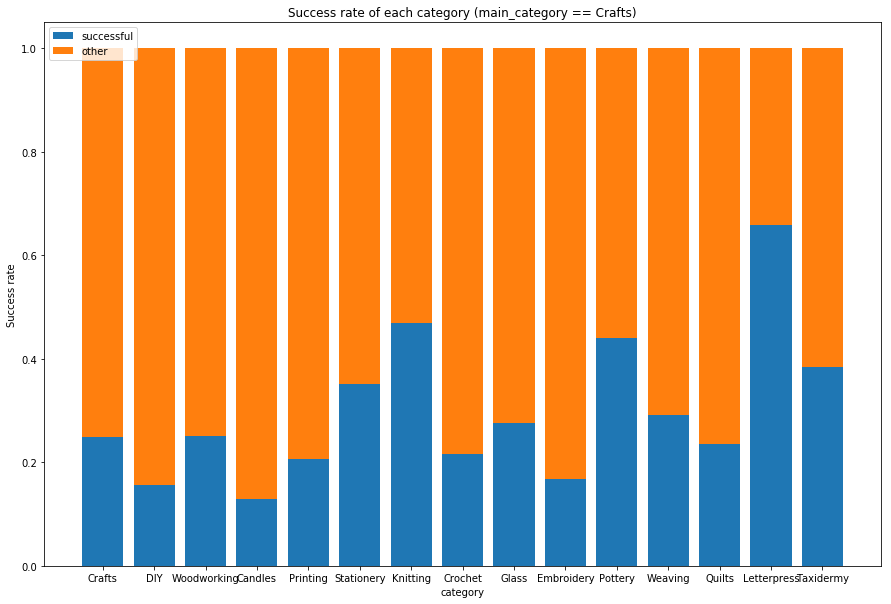

In [141]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Crafts)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Journalism')

In [142]:
print(df_kick['category'][df_kick['main_category'] == 'Journalism'].value_counts(dropna=False))

Journalism    1747
Web           1247
Print          727
Video          428
Audio          410
Photo          196
Name: category, dtype: int64


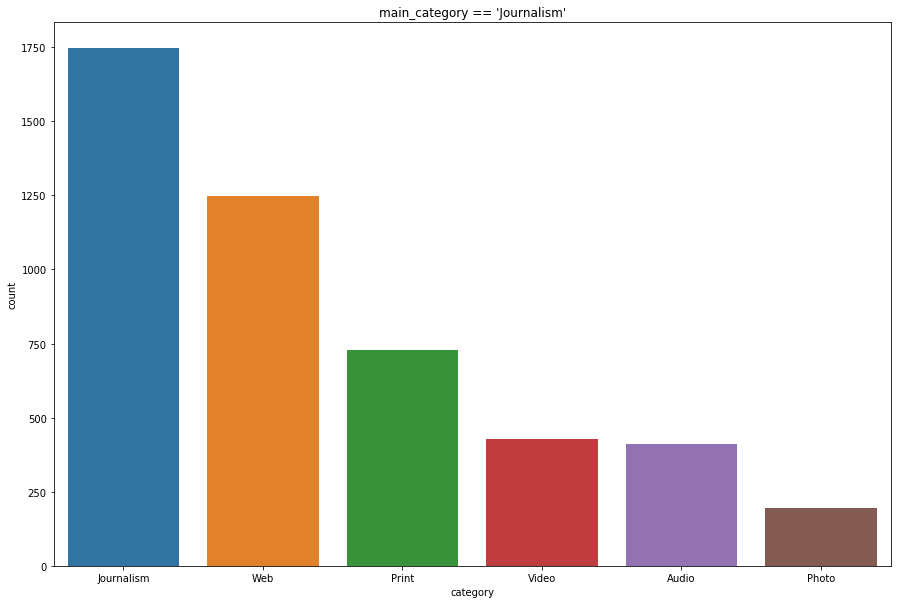

In [143]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Journalism'],
                 order = df_kick['category'][df_kick['main_category'] == 'Journalism'].value_counts().index) \
                    .set_title("main_category == 'Journalism'")

### Correlating category (main_category == 'Journalism') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

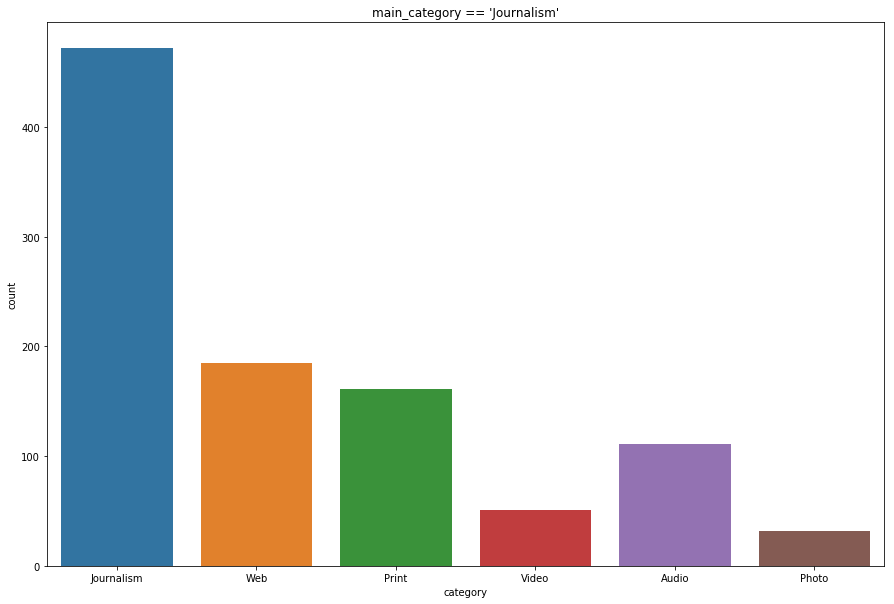

In [144]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Journalism'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Journalism'].value_counts().index) \
                    .set_title("main_category == 'Journalism'")

In [145]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Journalism'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [146]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Journalism'].value_counts()
# df_category_all_count.to_dict()

In [147]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

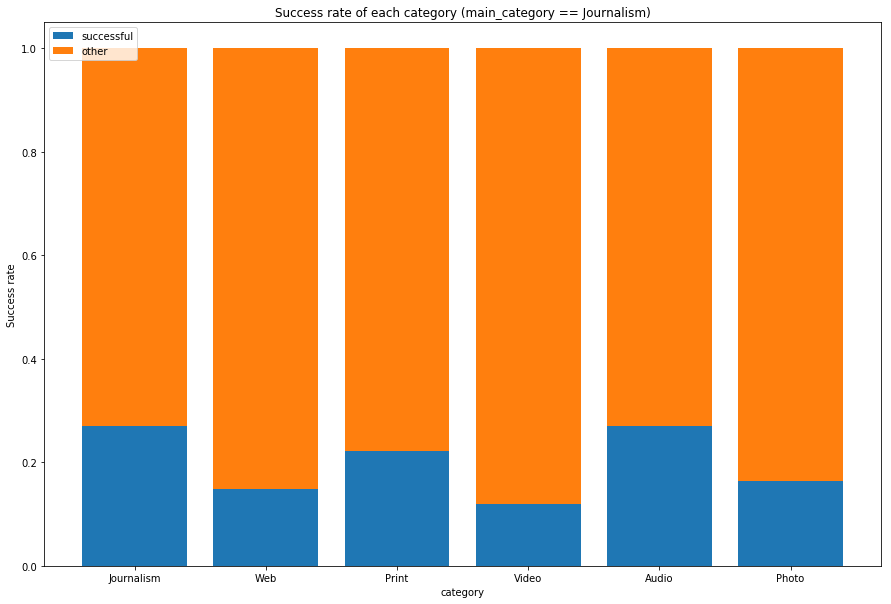

In [148]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Journalism)')
plt.legend(loc='upper left')
plt.show()

### Countplot - category (main_category == 'Dance')

In [149]:
print(df_kick['category'][df_kick['main_category'] == 'Dance'].value_counts(dropna=False))

Dance           2322
Performances    1013
Spaces           200
Workshops        164
Residencies       69
Name: category, dtype: int64


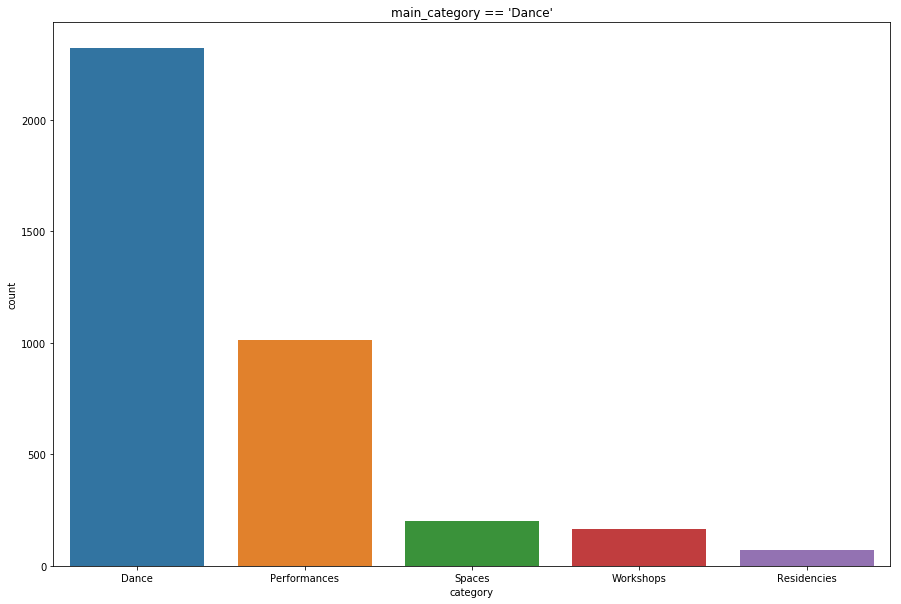

In [150]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Dance'],
                 order = df_kick['category'][df_kick['main_category'] == 'Dance'].value_counts().index) \
                    .set_title("main_category == 'Dance'")

### Correlating category (main_category == 'Dance') and state
#### Observations.
- Success rates are different between category in the main_category.

#### Decisions.
- Consider category in the main_category for model training.

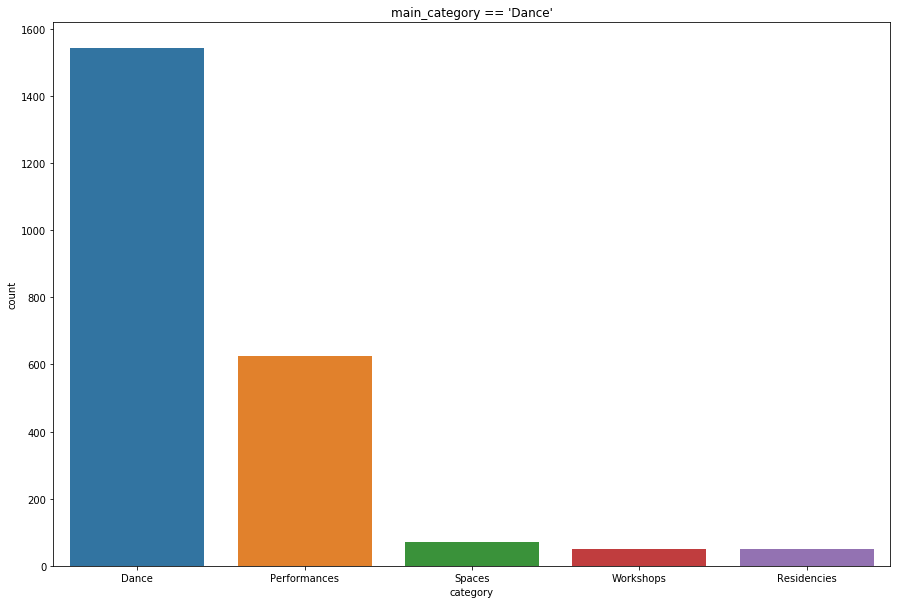

In [151]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['category'][df_kick['main_category'] == 'Dance'][df_kick['state'] == 'successful'],
                 order = df_kick['category'][df_kick['main_category'] == 'Dance'].value_counts().index) \
                    .set_title("main_category == 'Dance'")

In [152]:
df_category_successful_count = df_kick['category'][df_kick['main_category'] == 'Dance'][df_kick['state'] == 'successful'].value_counts()
# df_category_successful_count.to_dict()

In [153]:
df_category_all_count = df_kick['category'][df_kick['main_category'] == 'Dance'].value_counts()
# df_category_all_count.to_dict()

In [154]:
success_rate = {}
other_rate = {}

for category in df_category_all_count.keys():
    success_rate[category] = df_category_successful_count[category] / df_category_all_count[category]
    other_rate[category] = 1.0 - success_rate[category]
# success_rate

category_success_rate.update(success_rate)
# category_success_rate

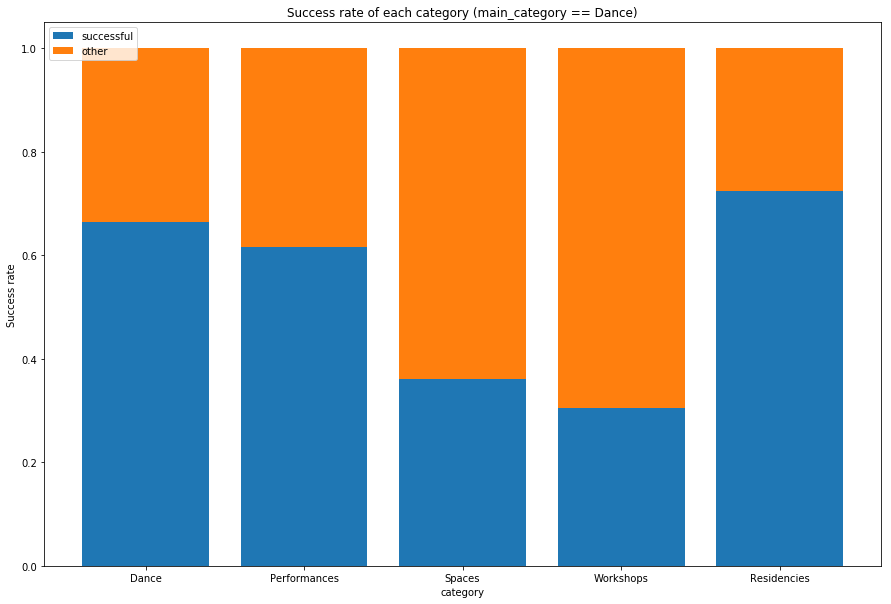

In [155]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('category')
plt.ylabel('Success rate')
plt.title('Success rate of each category (main_category == Dance)')
plt.legend(loc='upper left')
plt.show()

### Countplot - currency

In [156]:
print(df_kick['currency'].value_counts(dropna=False))

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64


In [157]:
print(df_kick['currency'].value_counts(dropna=False, normalize=True))

USD    0.780025
GBP    0.090139
EUR    0.045965
CAD    0.039513
AUD    0.020995
SEK    0.004722
MXN    0.004627
NZD    0.003895
DKK    0.002982
CHF    0.002028
NOK    0.001907
HKD    0.001632
SGD    0.001466
JPY    0.000106
Name: currency, dtype: float64


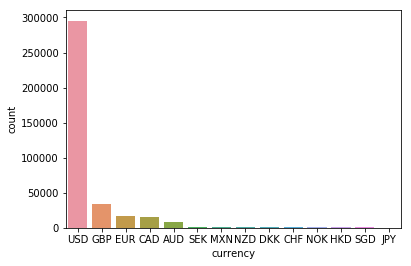

In [158]:
g = sns.countplot(df_kick['currency'],
                 order = df_kick['currency'].value_counts().index)

### Correlating currency and state
#### Observations.
- Success rates are different between currency.

#### Decisions.
- Consider currency for model training.

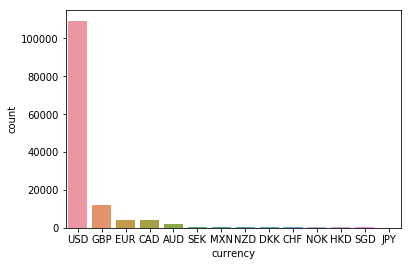

In [159]:
g = sns.countplot(df_kick['currency'][df_kick['state'] == 'successful'],
                 order = df_kick['currency'].value_counts().index)

In [160]:
df_main_category_successful_count = df_kick['currency'][df_kick['state'] == 'successful'].value_counts()
# df_main_category_successful_count.to_dict()

In [161]:
df_main_category_all_count = df_kick['currency'].value_counts()
# df_main_category_all_count.to_dict()

In [162]:
success_rate = {}
other_rate = {}

for main_category in df_main_category_all_count.keys():
    success_rate[main_category] = df_main_category_successful_count[main_category] / df_main_category_all_count[main_category]
    other_rate[main_category] = 1.0 - success_rate[main_category]
# success_rate

currency_success_rate = success_rate
currency_success_rate

{'USD': 0.37031808101840097,
 'GBP': 0.35394937302238366,
 'EUR': 0.22303935650675094,
 'CAD': 0.2765004678518915,
 'AUD': 0.2529559748427673,
 'SEK': 0.284675615212528,
 'MXN': 0.22602739726027396,
 'NZD': 0.303728813559322,
 'DKK': 0.32063773250664307,
 'CHF': 0.24348958333333334,
 'NOK': 0.2257617728531856,
 'HKD': 0.34951456310679613,
 'SGD': 0.3207207207207207,
 'JPY': 0.175}

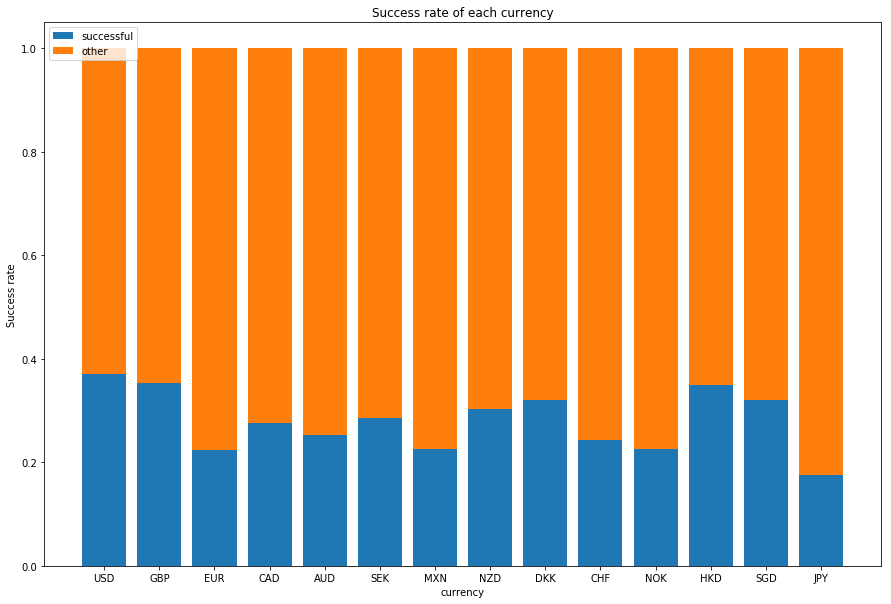

In [163]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('currency')
plt.ylabel('Success rate')
plt.title('Success rate of each currency')
plt.legend(loc='upper left')
plt.show()

### Countplot - country

In [164]:
print(df_kick['country'].value_counts(dropna=False))

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64


In [165]:
print(df_kick['country'].value_counts(dropna=False, normalize=True))

US      0.772794
GB      0.088924
CA      0.038969
AU      0.020702
DE      0.011015
N,0"    0.010027
FR      0.007762
IT      0.007600
NL      0.007574
ES      0.006011
SE      0.004640
MX      0.004627
NZ      0.003821
DK      0.002939
IE      0.002142
CH      0.002010
NO      0.001870
HK      0.001632
BE      0.001629
AT      0.001577
SG      0.001466
LU      0.000164
JP      0.000106
Name: country, dtype: float64


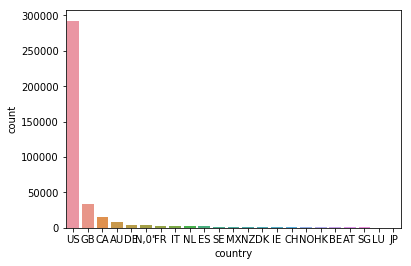

In [166]:
g = sns.countplot(df_kick['country'],
                 order = df_kick['country'].value_counts().index)

### Correlating country and state
#### Observations.
- Success rates are different between country.

#### Decisions.
- Consider country for model training.

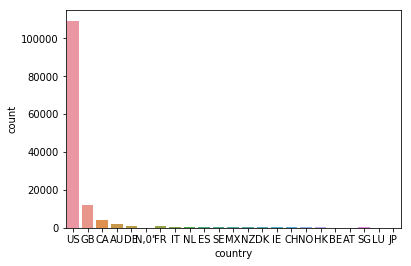

In [167]:
g = sns.countplot(df_kick['country'][df_kick['state'] == 'successful'],
                 order = df_kick['country'].value_counts().index)

In [168]:
df_main_category_successful_count = df_kick['country'][df_kick['state'] == 'successful'].value_counts()
# df_main_category_successful_count.to_dict()

In [169]:
df_main_category_all_count = df_kick['country'].value_counts()
# df_main_category_all_count.to_dict()

In [170]:
success_rate = {}
other_rate = {}

for main_category in df_main_category_all_count.keys():
    success_rate[main_category] = df_main_category_successful_count[main_category] / df_main_category_all_count[main_category]
    other_rate[main_category] = 1.0 - success_rate[main_category]
# success_rate

country_success_rate = success_rate
# country_success_rate

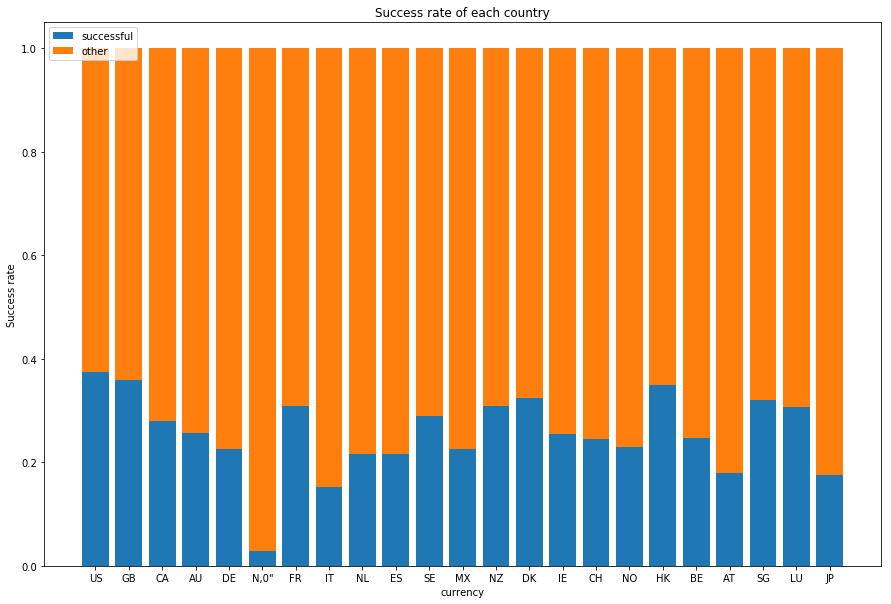

In [171]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('currency')
plt.ylabel('Success rate')
plt.title('Success rate of each country')
plt.legend(loc='upper left')
plt.show()

### Countplot - launched

I referenced this kernel to use the date features.

https://www.kaggle.com/kabure/kickstarter-interactive-explanatory-exploration

In [172]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period("M")
df_kick['laun_year'] = df_kick['launched'].dt.to_period("A")
df_kick['laun_hour'] = df_kick['launched'].dt.hour

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['dead_month_year'] = df_kick['deadline'].dt.to_period("M")
df_kick['dead_year'] = df_kick['launched'].dt.to_period("A")

In [173]:
#Creating a new columns with Campaign total months
df_kick['time_campaign'] = df_kick['dead_month_year'] - df_kick['laun_month_year']
df_kick['time_campaign'] = df_kick['time_campaign'].astype(int)

In [174]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,laun_month_year,laun_year,laun_hour,dead_month_year,dead_year,time_campaign
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,2015-08,2015,12,2015-10,2015,2
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,2017-09,2017,4,2017-11,2017,2
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,2013-01,2013,0,2013-02,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,2012-03,2012,3,2012-04,2012,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,2015-07,2015,8,2015-08,2015,1


In [175]:
df_kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 21 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
laun_month_year     378661 non-null object
laun_year           378661 non-null object
laun_hour           378661 non-null int64
dead_month_year     378661 non-null object
dead_year           378661 non-null object
time_campai

In [176]:
df_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,laun_hour,time_campaign
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,13.092468,1.133616
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,7.709153,2.185746
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,5.000000,1.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,16.000000,1.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,20.000000,1.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,23.000000,549.000000


In [177]:
df_kick.describe(include=['O'])

,name,category,main_category,currency,state,country,laun_month_year,laun_year,dead_month_year,dead_year
count,378657,378661,378661,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,6,23,107,11,107,11
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US,2014-07,2015,2014-08,2015
freq,41,22314,63585,295365,197719,292627,10775,77300,9987,77300


In [178]:
print(df_kick['laun_year'].value_counts(dropna=False))

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Freq: A-DEC, Name: laun_year, dtype: int64


In [179]:
print(df_kick['laun_year'].value_counts(dropna=False).index.sort_values(ascending=True))

PeriodIndex(['1970', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018'],
            dtype='period[A-DEC]', freq='A-DEC')


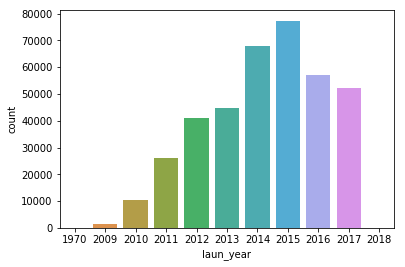

In [180]:
g = sns.countplot(df_kick['laun_year'],
                  order=df_kick['laun_year'].value_counts(dropna=False).index.sort_values(ascending=True))

In [181]:
print(df_kick['laun_month_year'].value_counts(dropna=False).index.sort_values(ascending=True))

PeriodIndex(['1970-01', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08',
             '2009-09', '2009-10', '2009-11', '2009-12',
             ...
             '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
             '2017-10', '2017-11', '2017-12', '2018-01'],
            dtype='period[M]', length=107, freq='M')


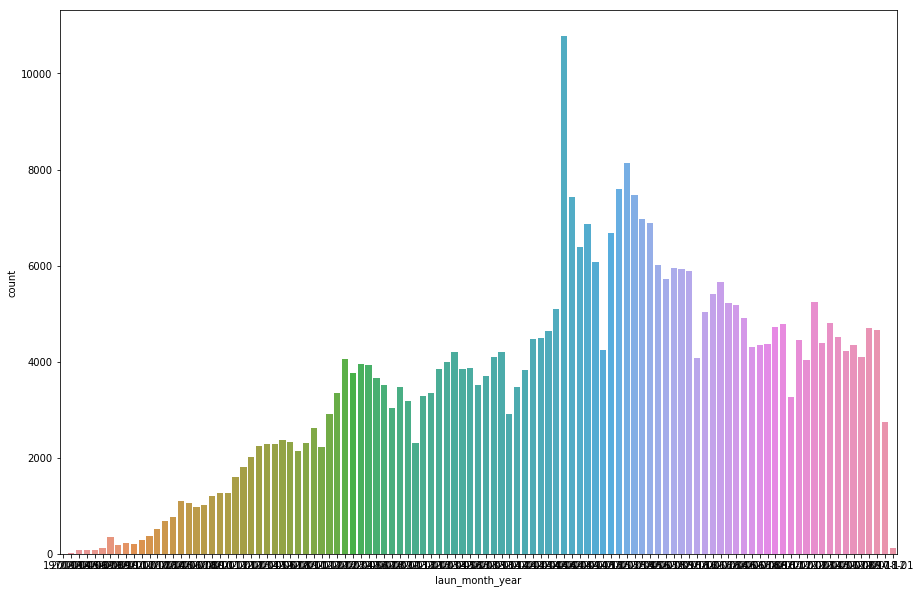

In [182]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['laun_month_year'],
                  order=df_kick['laun_month_year'].value_counts(dropna=False).index.sort_values(ascending=True))

### Countplot - deadline

In [183]:
print(df_kick['dead_year'].value_counts(dropna=False))

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Freq: A-DEC, Name: dead_year, dtype: int64


In [184]:
print(df_kick['dead_year'].value_counts(dropna=False).index.sort_values(ascending=True))

PeriodIndex(['1970', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018'],
            dtype='period[A-DEC]', freq='A-DEC')


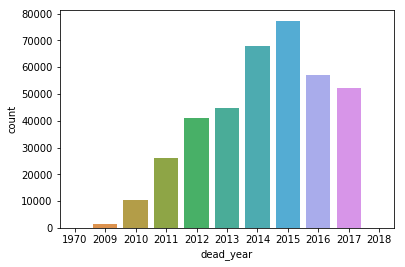

In [185]:
g = sns.countplot(df_kick['dead_year'],
                  order=df_kick['dead_year'].value_counts(dropna=False).index.sort_values(ascending=True))

In [186]:
print(df_kick['dead_month_year'].value_counts(dropna=False).index.sort_values(ascending=True))

PeriodIndex(['2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10',
             '2009-11', '2009-12', '2010-01', '2010-02',
             ...
             '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
             '2017-12', '2018-01', '2018-02', '2018-03'],
            dtype='period[M]', length=107, freq='M')


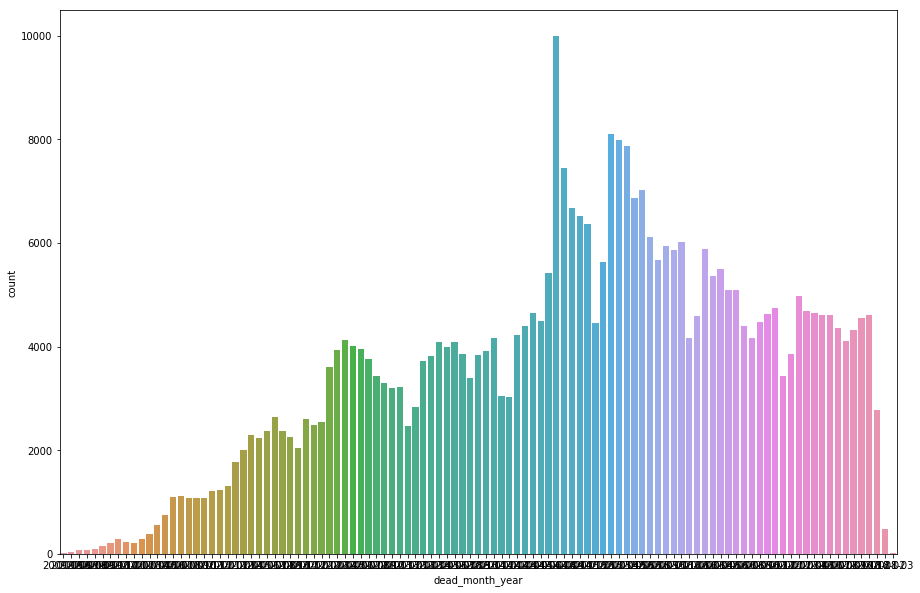

In [187]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['dead_month_year'],
                  order=df_kick['dead_month_year'].value_counts(dropna=False).index.sort_values(ascending=True))

### Countplot - time_campaign (created feature)

In [188]:
print(df_kick['time_campaign'].value_counts(dropna=False))

1      280486
2       67283
0       27309
3        3560
4          16
484         2
488         1
487         1
485         1
483         1
549         1
Name: time_campaign, dtype: int64


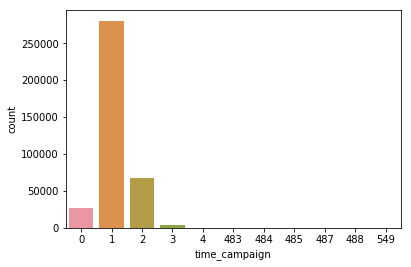

In [189]:
g = sns.countplot(df_kick['time_campaign'],
                  order=df_kick['time_campaign'].value_counts(dropna=False).index.sort_values(ascending=True))

### Correlating time_campaign (created feature) and state
#### Observations.
- Roughly speaking, the longer time_campaign is, the less successful rate is.

#### Decisions.
- Consider time_campaign for model training.

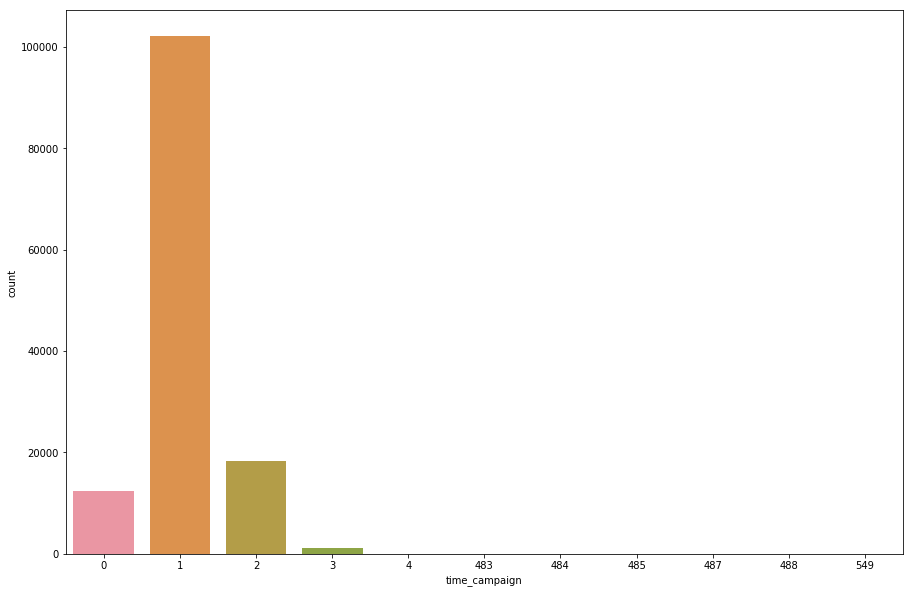

In [190]:
plt.figure(figsize=(15, 10))
g = sns.countplot(df_kick['time_campaign'][df_kick['state'] == 'successful'],
                  order=df_kick['time_campaign'].value_counts(dropna=False).index.sort_values(ascending=True))

In [191]:
df_time_campaign_successful_count = df_kick['time_campaign'][df_kick['state'] == 'successful'].value_counts()
df_time_campaign_successful_count.to_dict()

{1: 102102, 2: 18240, 0: 12494, 3: 1117, 4: 3}

In [192]:
df_time_campaign_all_count = df_kick['time_campaign'].value_counts()
df_time_campaign_all_count.to_dict()

{1: 280486,
 2: 67283,
 0: 27309,
 3: 3560,
 4: 16,
 484: 2,
 488: 1,
 487: 1,
 485: 1,
 483: 1,
 549: 1}

In [193]:
success_rate = {}
other_rate = {}

print(sorted(df_time_campaign_all_count.keys()))

for time_campaign in sorted(df_time_campaign_all_count.keys()):
#     time_campaign = str(time_campaign)
#     print(time_campaign, df_time_campaign_successful_count[time_campaign])
#     print(df_time_campaign_all_count[time_campaign])
    if time_campaign not in df_time_campaign_successful_count.keys():
        df_time_campaign_successful_count[time_campaign] = 0
    
    success_rate[time_campaign] = df_time_campaign_successful_count[time_campaign] / df_time_campaign_all_count[time_campaign]
    other_rate[time_campaign] = 1.0 - success_rate[time_campaign]
# success_rate

[0, 1, 2, 3, 4, 483, 484, 485, 487, 488, 549]


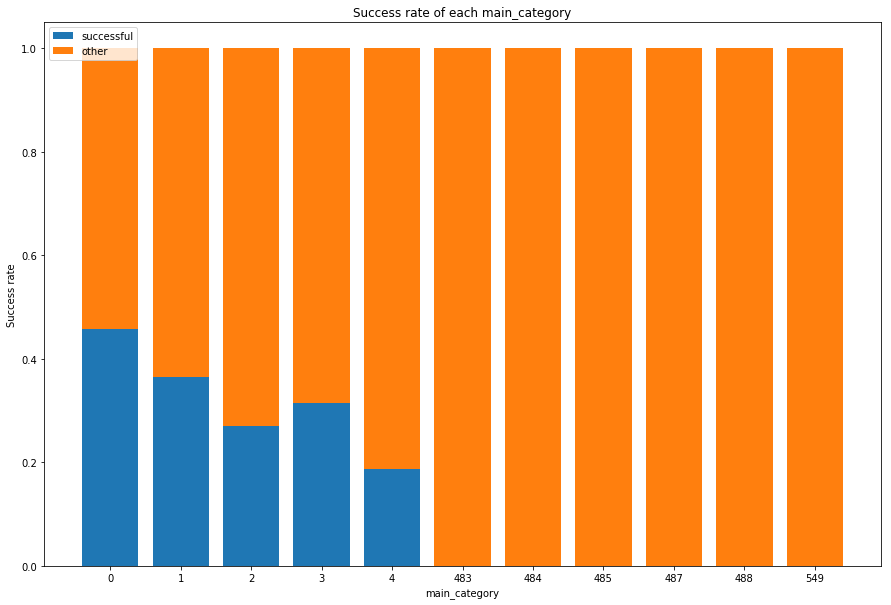

In [194]:
plt.figure(figsize=(15, 10))
names = list(success_rate.keys())
values_success = list(success_rate.values())
values_other = list(other_rate.values())
plt.bar(range(len(success_rate)),values_success,tick_label=names, label='successful')
plt.bar(range(len(success_rate)),values_other,tick_label=names, label='other', bottom=values_success)
plt.xlabel('main_category')
plt.ylabel('Success rate')
plt.title('Success rate of each main_category')
plt.legend(loc='upper left')
plt.show()

## 3. Find explanatory variables which seem to be useful to explain the objective variable

To sum up the section 2, I select the following features.

- Numerical features
    - Integer
        - ~~ID~~
            - would not affect successful or not.
        - **backers**
            - Majority of successful companies has more than 10 backers.
            - Log scale would be better.
    - Float
        - ~~goal~~
        - ~~pledged~~
        - ~~usd pledged~~
        - **usd_pledged_real**
            - Successful companies has a strong peak between 10^3 to 10^4 usd_goal_real.
            - Log scale would be better.
        - **usd_goal_real**
            - Successful companies has a strong peak between 10^3 to 10^4 usd_goal_real.
            - Log scale would be better.
- Categorical features
    - Strings (object)
        - ~~name~~
            - would not affect successful or not.
        - **category**
            - Success rates are different between category.
        - ~~main_category~~
            - Success rates are different between main_category.
            - However, category would be more accurate to explain.
        - **currency**
            - Success rates are different between currency.
        - ~~deadline~~
            - time_campaign would be more accurate to explain.
        - ~~launched~~
            - time_campaign would be more accurate to explain.
        - **state**
            - Objective variable
        - **country**
            - Success rates are different between country.
        - **time_campaign (created feature)**
            - Roughly speaking, the longer time_campaign is, the less successful rate is.

## 4. Use the algorithms which you have learned on Day 1
- Use linear regression for regression problems.
- Use logistic regression for classification problems.
- If you use algorithms which cannot treat as qualitative variables, replace it with dummy variables.

In [195]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,laun_month_year,laun_year,laun_hour,dead_month_year,dead_year,time_campaign
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,2015-08,2015,12,2015-10,2015,2
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,2017-09,2017,4,2017-11,2017,2
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,2013-01,2013,0,2013-02,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,2012-03,2012,3,2012-04,2012,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,2015-07,2015,8,2015-08,2015,1


### Create log-scale features

In [196]:
df_kick['backers_log10'] = np.log10(df_kick['backers'] + 1e-8)
df_kick['usd_pledged_real_log10'] = np.log10(df_kick['usd_pledged_real'] + 1e-8)
df_kick['usd_goal_real_log10'] = np.log10(df_kick['usd_goal_real'] + 1e-8)

In [197]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_goal_real,laun_month_year,laun_year,laun_hour,dead_month_year,dead_year,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,1533.95,2015-08,2015,12,2015-10,2015,2,-8.000000e+00,-8.000000e+00,3.185811
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,30000.00,2017-09,2017,4,2017-11,2017,2,1.176091e+00,3.383995e+00,4.477121
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,45000.00,2013-01,2013,0,2013-02,2013,1,4.771213e-01,2.342423e+00,4.653213
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,5000.00,2012-03,2012,3,2012-04,2012,1,4.342945e-09,4.342945e-09,3.698970
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,19500.00,2015-07,2015,8,2015-08,2015,1,1.146128e+00,3.108227e+00,4.290035


### Create dummy variables for category

- Replace category to category_success_rate.
- There are 159 unique categories.

In [198]:
len(category_success_rate)

159

In [199]:
df_kick['category_dummy'] = df_kick['category'].replace(category_success_rate)

In [200]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,laun_month_year,laun_year,laun_hour,dead_month_year,dead_year,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,2015-08,2015,12,2015-10,2015,2,-8.000000e+00,-8.000000e+00,3.185811,0.355734
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,2017-09,2017,4,2017-11,2017,2,1.176091e+00,3.383995e+00,4.477121,0.388011
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,2013-01,2013,0,2013-02,2013,1,4.771213e-01,2.342423e+00,4.653213,0.388011
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,2012-03,2012,3,2012-04,2012,1,4.342945e-09,4.342945e-09,3.698970,0.408978
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,2015-07,2015,8,2015-08,2015,1,1.146128e+00,3.108227e+00,4.290035,0.303720


### Create dummy variables for currency

- Replace currency to currency_success_rate.
- There are 14 unique categories.

In [201]:
len(currency_success_rate)

14

In [202]:
df_kick['currency_dummy'] = df_kick['currency'].replace(currency_success_rate)

In [203]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,laun_year,laun_hour,dead_month_year,dead_year,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy,currency_dummy
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,2015,12,2015-10,2015,2,-8.000000e+00,-8.000000e+00,3.185811,0.355734,0.353949
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,2017,4,2017-11,2017,2,1.176091e+00,3.383995e+00,4.477121,0.388011,0.370318
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,2013,0,2013-02,2013,1,4.771213e-01,2.342423e+00,4.653213,0.388011,0.370318
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,2012,3,2012-04,2012,1,4.342945e-09,4.342945e-09,3.698970,0.408978,0.370318
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,2015,8,2015-08,2015,1,1.146128e+00,3.108227e+00,4.290035,0.303720,0.370318


### Create dummy variables for country

- Replace country to country_success_rate.
- There are 23 unique categories.

In [204]:
len(country_success_rate)

23

In [205]:
df_kick['country_dummy'] = df_kick['country'].replace(country_success_rate)

In [206]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,laun_hour,dead_month_year,dead_year,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy,currency_dummy,country_dummy
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,12,2015-10,2015,2,-8.000000e+00,-8.000000e+00,3.185811,0.355734,0.353949,0.358369
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,4,2017-11,2017,2,1.176091e+00,3.383995e+00,4.477121,0.388011,0.370318,0.373510
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,0,2013-02,2013,1,4.771213e-01,2.342423e+00,4.653213,0.388011,0.370318,0.373510
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,3,2012-04,2012,1,4.342945e-09,4.342945e-09,3.698970,0.408978,0.370318,0.373510
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,8,2015-08,2015,1,1.146128e+00,3.108227e+00,4.290035,0.303720,0.370318,0.373510


### Create dummy variables for time_campaign

- Replace time_campaign > 5 to 5.
    - The extraordinary value should be removed because simple logistic regression is applied this time.

In [207]:
df_kick['time_campaign_dummy'] = df_kick['time_campaign']
df_kick['time_campaign_dummy'].loc[df_kick['time_campaign_dummy'] >= 5] = 5

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [208]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,dead_month_year,dead_year,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy,currency_dummy,country_dummy,time_campaign_dummy
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,2015-10,2015,2,-8.000000e+00,-8.000000e+00,3.185811,0.355734,0.353949,0.358369,2
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,2017-11,2017,2,1.176091e+00,3.383995e+00,4.477121,0.388011,0.370318,0.373510,2
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,2013-02,2013,1,4.771213e-01,2.342423e+00,4.653213,0.388011,0.370318,0.373510,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,2012-04,2012,1,4.342945e-09,4.342945e-09,3.698970,0.408978,0.370318,0.373510,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,2015-08,2015,1,1.146128e+00,3.108227e+00,4.290035,0.303720,0.370318,0.373510,1


In [209]:
df_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,laun_hour,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy,currency_dummy,country_dummy,time_campaign_dummy
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,13.092468,1.133616,-0.094977,1.375478,3.750108,0.356879,0.353762,0.353762,1.124571
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,7.709153,2.185746,3.364131,3.910056,0.737391,0.141431,0.040255,0.052855,0.522084
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,0.000000,-8.000000,-8.000000,-2.000000,0.059574,0.175000,0.027653,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,5.000000,1.000000,0.301030,1.491362,3.301030,0.255787,0.370318,0.373510,1.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,16.000000,1.000000,1.079181,2.795414,3.740363,0.348816,0.370318,0.373510,1.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,20.000000,1.000000,1.748188,3.607455,4.190332,0.433612,0.370318,0.373510,1.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,23.000000,549.000000,5.341201,7.308329,8.221053,0.771429,0.370318,0.373510,5.000000


### Create dummy variables for state

- Replace
    - Successful to 1
    - Other to 0

In [210]:
df_kick['state_dummy'] = df_kick['state']
df_kick['state_dummy'].loc[df_kick['state_dummy'] != 'successful'] = 0
df_kick['state_dummy'].loc[df_kick['state_dummy'] == 'successful'] = 1

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [211]:
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,dead_year,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy,currency_dummy,country_dummy,time_campaign_dummy,state_dummy
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,2015,2,-8.000000e+00,-8.000000e+00,3.185811,0.355734,0.353949,0.358369,2,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,2017,2,1.176091e+00,3.383995e+00,4.477121,0.388011,0.370318,0.373510,2,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,2013,1,4.771213e-01,2.342423e+00,4.653213,0.388011,0.370318,0.373510,1,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,2012,1,4.342945e-09,4.342945e-09,3.698970,0.408978,0.370318,0.373510,1,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,2015,1,1.146128e+00,3.108227e+00,4.290035,0.303720,0.370318,0.373510,1,0


In [212]:
df_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,laun_hour,time_campaign,backers_log10,usd_pledged_real_log10,usd_goal_real_log10,category_dummy,currency_dummy,country_dummy,time_campaign_dummy,state_dummy
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,13.092468,1.133616,-0.094977,1.375478,3.750108,0.356879,0.353762,0.353762,1.124571,0.353762
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,7.709153,2.185746,3.364131,3.910056,0.737391,0.141431,0.040255,0.052855,0.522084,0.478137
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,0.000000,-8.000000,-8.000000,-2.000000,0.059574,0.175000,0.027653,0.000000,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,5.000000,1.000000,0.301030,1.491362,3.301030,0.255787,0.370318,0.373510,1.000000,0.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,16.000000,1.000000,1.079181,2.795414,3.740363,0.348816,0.370318,0.373510,1.000000,0.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,20.000000,1.000000,1.748188,3.607455,4.190332,0.433612,0.370318,0.373510,1.000000,1.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,23.000000,549.000000,5.341201,7.308329,8.221053,0.771429,0.370318,0.373510,5.000000,1.000000


### Logistic regression using Sckit-learn

- Objective variable
    - state_dummy (successful = 1, other = 0)
- Explanatory variables
    - backers_log10
    - usd_pledged_real_log10
    - usd_goal_real_log10
    - category_dummy
    - currency_dummy
    - time_campaign_dummy

In [213]:
y = df_kick["state_dummy"].values
X = df_kick[["backers_log10", "usd_pledged_real_log10", "usd_goal_real_log10", "category_dummy", "currency_dummy", "time_campaign_dummy"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=100, fit_intercept=True, random_state=1234)
clf.fit(X, y)

# Weight
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
w6 = clf.coef_[0, 5]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6))

w0 = 0.813, w1 = 2.839, w2 = 164.113, w3 = -165.700, w4 = 3.265, w5 = 5.014, w6 = -0.332


## 5. Check the prediction accuracy or discrimination accuracy
- Calculate MSE, RMSE and MAE for regression problems.
- Create a confusion matrix and calculate accuracy, recall and precision for classification problems.

In [214]:
# Predict labels
y_est = clf.predict(X)

# Log-likelihood
print('Log-likelihood = {:.3f}'.format(- log_loss(y, y_est)))

# Accuracy
print('Accuracy = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

# Precision, Recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('Precision = {:.3f}%'.format(100 * precision[0]))
print('Recal = {:.3f}%'.format(100 * recall[0]))
print('F1-score = {:.3f}%'.format(100 * f1_score[0]))

Log-likelihood = -0.178
Accuracy = 99.486%
Precision = 99.891%
Recal = 99.313%
F1-score = 99.601%


In [215]:
# Confusion matrix
conf_mat = confusion_matrix(y, y_est)
conf_mat = pd.DataFrame(conf_mat, 
                        index=['Correct = Other', 'Correct = Successful'], 
                        columns=['Predict = Other', 'Predict = Successful'])
conf_mat

,Predict = Other,Predict = Successful
Correct = Other,243024,1681
Correct = Successful,266,133690


### Summary of Day 1
- Objective of Day 1 : Build a supervised machine learning model based on the lecture on Day 1. Don't care about the accuracy for now.
    - I could create a model that the accuracy is more than 99% against train data.
        - Created graphs
        - Created dummy variables
        - Predict just successful or not.
        - Logistic regression is applied.
        - Generalization performance is not considered in this notebook.

## 6. Publish your notebook which you have done by then on Kernels or Github
- This notebook, Done!